In [22]:
# This time we take the data from "results_and_resampled_data.pickle", perform pca and see the relevance of the pca dimensions


import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd


# DATA_3D_TO_USE = '3D_old_noDTW'
DATA_3D_TO_USE = '3D_DTW'

ALLTRACKS = ['Percussions (ID1)','Xylophone (ID3)', 'Texture (ID5)', 'Brass (ID7)', 'Voice (ID9)']
ALLAUTOMATIONS = ['Recording Trajectory X / ControlGris', 'Recording Trajectory Y / ControlGris', 'Recording Trajectory Z / ControlGris']

In [23]:
# Load the data
with open("results_and_resampled_data.pickle", "rb") as f:
    data = pickle.load(f)

# Open data/participants.csv
participant_start = {}
with open('data/participants.csv', 'r') as f:
    plines = f.readlines()
assert plines[0].strip().replace(' ','') == 'Participant,Startedwith', 'First line of participants.csv must be "Participant,Start"'

for line in plines[1:]:
    participant, startedwith = tuple([e.strip() for e in line.strip().split(',')])
    assert participant in data.keys(), 'Participant {} not found in data'.format(participant)
    assert startedwith in ['2D', '3D'], 'Startedwith must be either 2D or 3D'
    participant_start[participant] = startedwith
print("Loaded data")

Loaded data


In [24]:
PARALLEL_PCA = False

if PARALLEL_PCA:
    for cur_player in data.keys():
        print("\nPlayer", cur_player)
        cur_startedwith = participant_start[cur_player]
        print("\tStarted with", cur_startedwith)

        cur_15D_data2D = pd.DataFrame()
        cur_15D_data3D = pd.DataFrame()

        assert np.all([track in data[cur_player] for track in ALLTRACKS]), 'Not all tracks found for participant %s'%cur_player

        for cur_track in ALLTRACKS:
            print("\tTrack", cur_track)
            
            assert np.all([automation in data[cur_player][cur_track] for automation in ALLAUTOMATIONS]), 'Not all automations found for participant %s and track %s'%(cur_player, cur_track)

            for cur_dimension in ALLAUTOMATIONS:
                assert cur_dimension in ['Recording Trajectory X / ControlGris', 'Recording Trajectory Y / ControlGris', 'Recording Trajectory Z / ControlGris'], 'Dimension not recognized'
                
                cur_dimensionstr = cur_dimension.replace('Recording Trajectory ', '').replace(' / ControlGris', '').strip()
                assert cur_dimensionstr in ['X', 'Y', 'Z'], 'Dimension not recognized'

                cur_track_str = cur_track.replace('Track','').split(' ')[0].strip()
                assert cur_track_str in ['Percussions','Xylophone','Texture','Brass','Voice']

                cur_colname = cur_track_str + '_' + cur_dimensionstr

                cur_data = data[cur_player][cur_track][cur_dimension][DATA_3D_TO_USE]

                cur_15D_data3D[cur_colname] = cur_data

                cur_data = data[cur_player][cur_track][cur_dimension]['2D']
                cur_15D_data2D[cur_colname] = cur_data

    
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
        
        max_explained_variance = 0.0
        for cur_15D_data,type2D3D, ax in zip([cur_15D_data2D, cur_15D_data3D],['2D','3D'], (ax1, ax2)):

            # print(cur_15D_data.head())
            # assert cur_15D_data.shape[1] == 15, 'Data shape is not 15'
            assert cur_15D_data.shape[1] <= 15, 'Data shape is > 15'
            dimensions = cur_15D_data.shape[1]
            # Perform PCA
            print('dimensions', dimensions)
            pca = PCA(n_components=dimensions)
            pca.fit(cur_15D_data)
            print("Explained variance ratio", pca.explained_variance_ratio_)
            # Plot as bars
            if type2D3D == '3D':
                ax.bar(range(1, dimensions+1), pca.explained_variance_ratio_, color='orange')
            else:
                ax.bar(range(1, dimensions+1), pca.explained_variance_ratio_)
            ax.set_xlabel('Principal component')
            ax.set_ylabel('Explained variance ratio')
            titll = 'PCA explained variance\np' + cur_player + ' '+type2D3D+' started with ' + cur_startedwith
            ax.set_title(titll)
            max_explained_variance = max(max_explained_variance, np.max(pca.explained_variance_ratio_))


            print("Mean", pca.mean_)
            print("Noise variance", pca.noise_variance_)
            print("n_components", pca.n_components_)


        ax1.set_ylim([0, max_explained_variance*1.15])
        ax2.set_ylim([0, max_explained_variance*1.15])

        import os
        if not os.path.exists('plots/pcas'):
            os.makedirs('plots/pcas')
        plt.savefig('plots/pcas/PCA_explained_variance_'+cur_player+'.png')

sPCA-Player ID1
	Started with 3D
		Track Percussions (ID1)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [0.46748163 0.38863217 0.1438862 ]
			 3D
				Dimensions 3
Explained variance ratio [0.59655518 0.32599322 0.0774516 ]


C:\Users\cimil\AppData\Local\Temp\ipykernel_18680\2152183505.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  series_explained_variances = pd.concat([series_explained_variances, pd.DataFrame([newrow])], ignore_index=True)


		Track Xylophone (ID3)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [0.57332223 0.3041323  0.12254548]
			 3D
				Dimensions 3
Explained variance ratio [0.53424605 0.32939123 0.13636272]
		Track Texture (ID5)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [0.40816551 0.31670647 0.27512802]
			 3D
				Dimensions 3
Explained variance ratio [0.62403848 0.31470169 0.06125983]
		Track Brass (ID7)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [0.48958652 0.37376262 0.13665087]
			 3D
				Dimensions 3
Explained variance ratio [0.59410933 0.31777453 0.08811614]
		Track Voice (ID9)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [9.99999968e-01 3.15745235e-08 0.00000000e+00]
			 3D
				Dimensions 3
Explained variance ratio [0.98977262 0.0091521  0.00107528]
sPCA-Player ID2
	Started with 2D
		Track Percussions (ID1)
shape 2D: (

C:\Users\cimil\AppData\Local\Temp\ipykernel_18680\2152183505.py:49: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_redraw, axes_redraw = plt.subplots(1, 2, figsize=(15,6))


sPCA-Player ID5
	Started with 3D
		Track Percussions (ID1)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [1. 0. 0.]
			 3D
				Dimensions 3
Explained variance ratio [9.98794769e-01 1.20521318e-03 1.79133872e-08]


C:\Users\cimil\AppData\Local\Temp\ipykernel_18680\2152183505.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))


		Track Xylophone (ID3)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [6.20820314e-01 3.78872307e-01 3.07378705e-04]
			 3D
				Dimensions 3
Explained variance ratio [0.61722823 0.36947922 0.01329255]
		Track Texture (ID5)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [0.52387878 0.27655735 0.19956387]
			 3D
				Dimensions 3
Explained variance ratio [0.45849042 0.39669569 0.14481389]
		Track Brass (ID7)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [9.99988283e-01 1.17171240e-05 5.06138794e-16]
			 3D
				Dimensions 3
Explained variance ratio [0.581747   0.36560486 0.05264814]
		Track Voice (ID9)
shape 2D: (3, 1000)
shape 3D: (3, 1000)
			 2D
				Dimensions 3
Explained variance ratio [5.55988218e-01 4.43624788e-01 3.86993998e-04]
			 3D
				Dimensions 3
Explained variance ratio [0.89151056 0.10848944 0.        ]
sPCA-Player ID6
	Started with 2D
		Track Percu

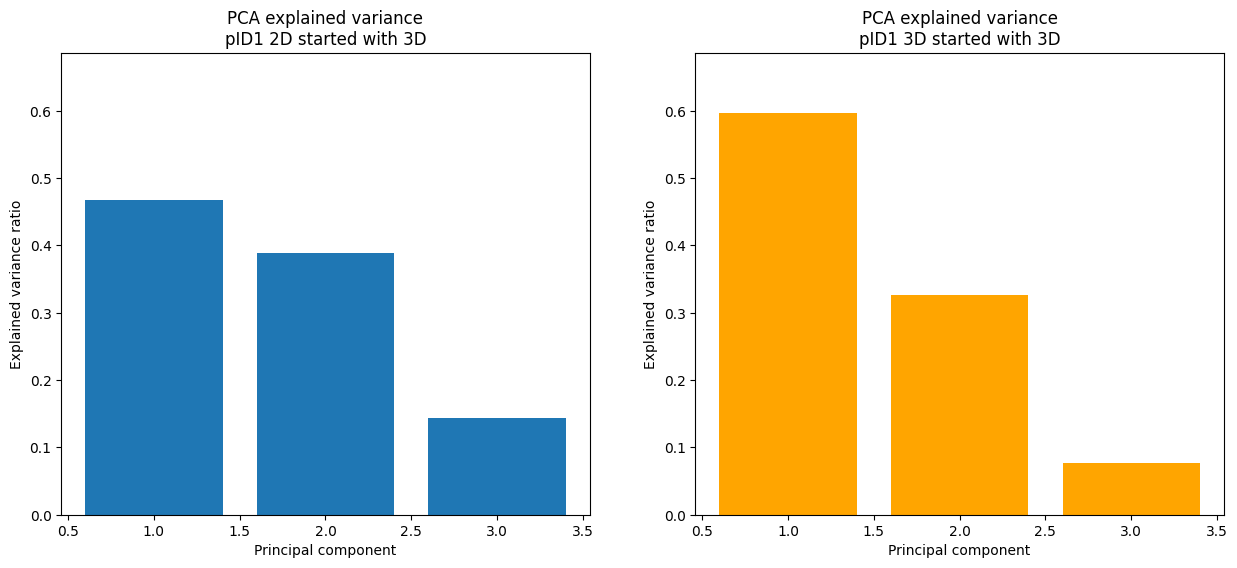

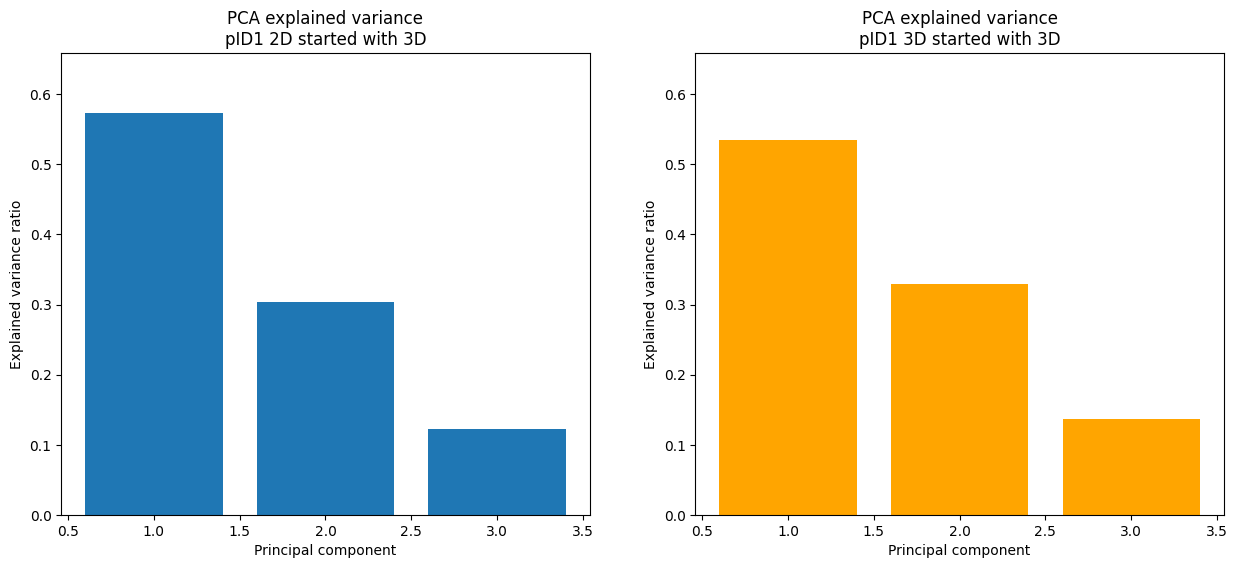

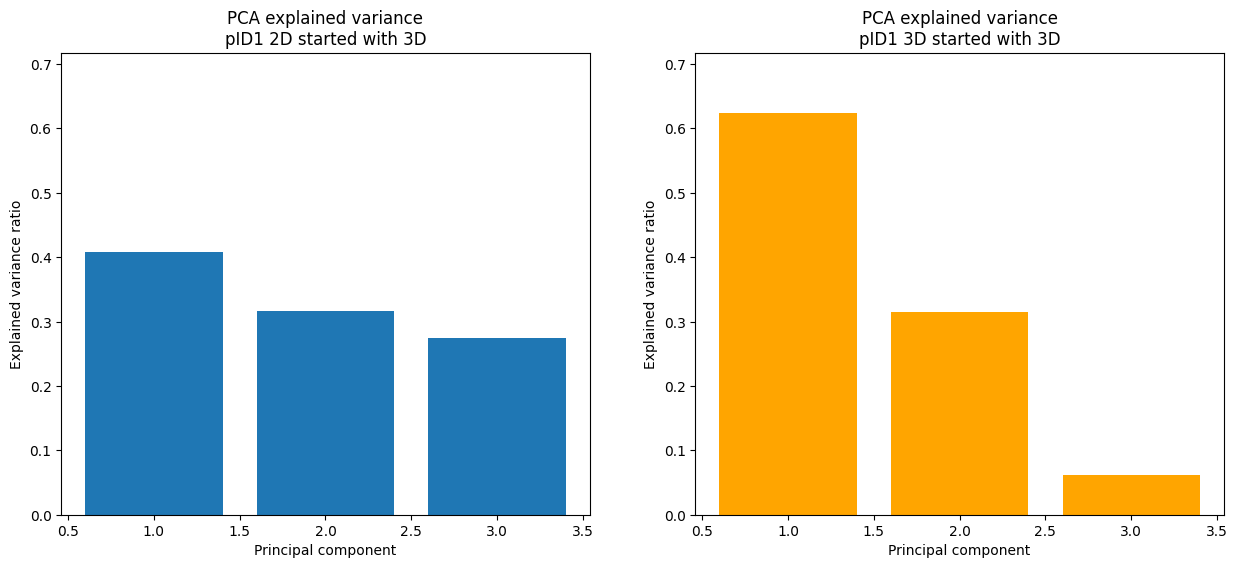

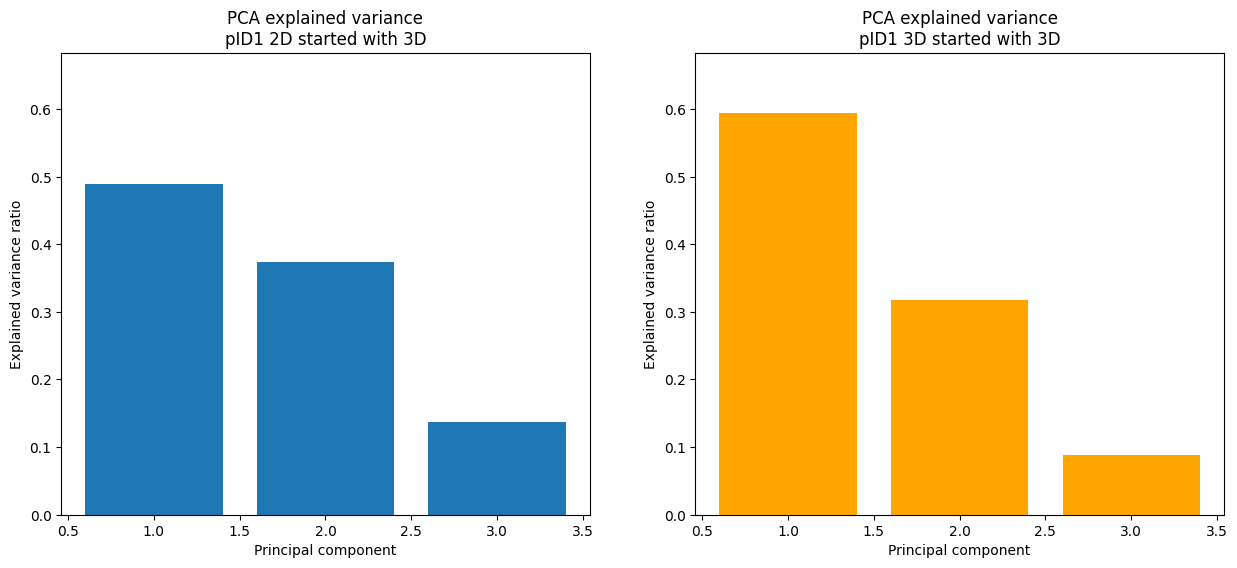

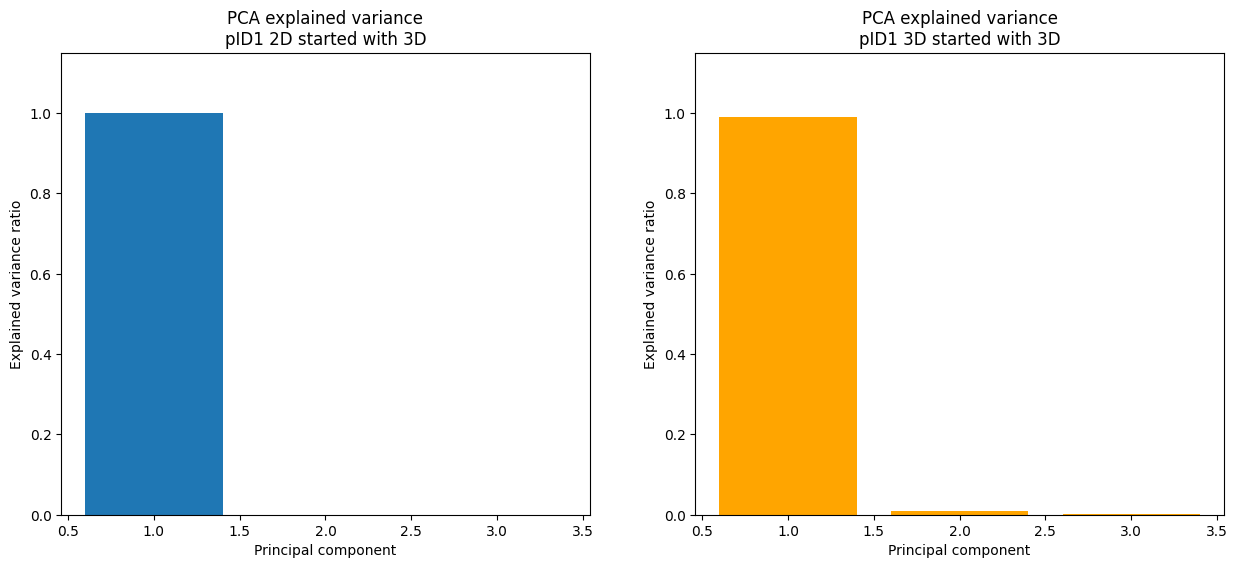

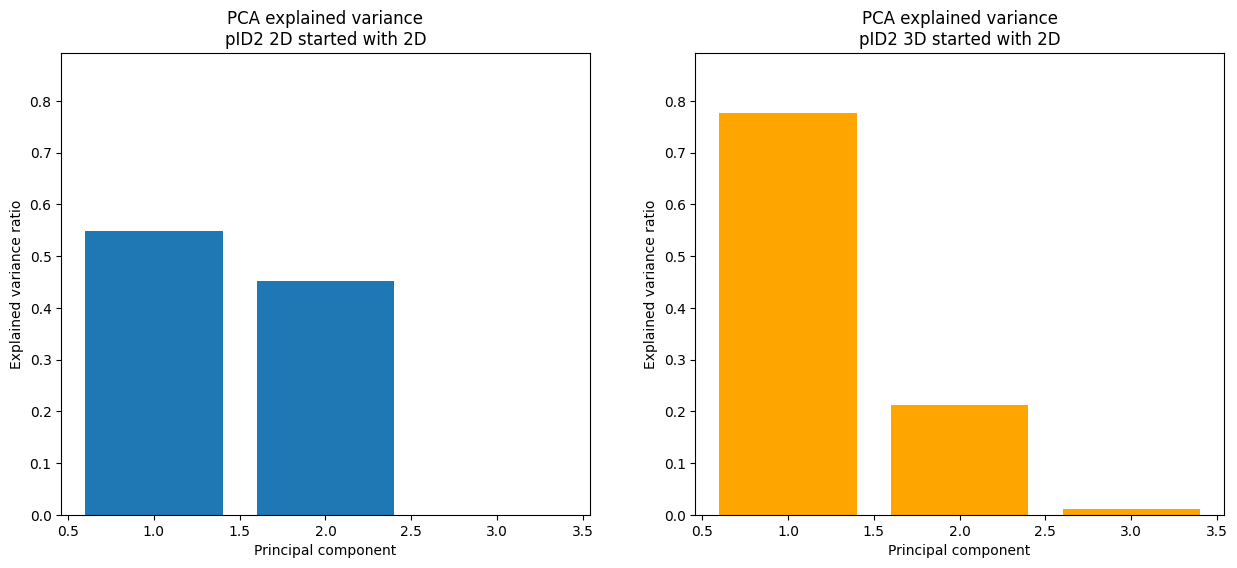

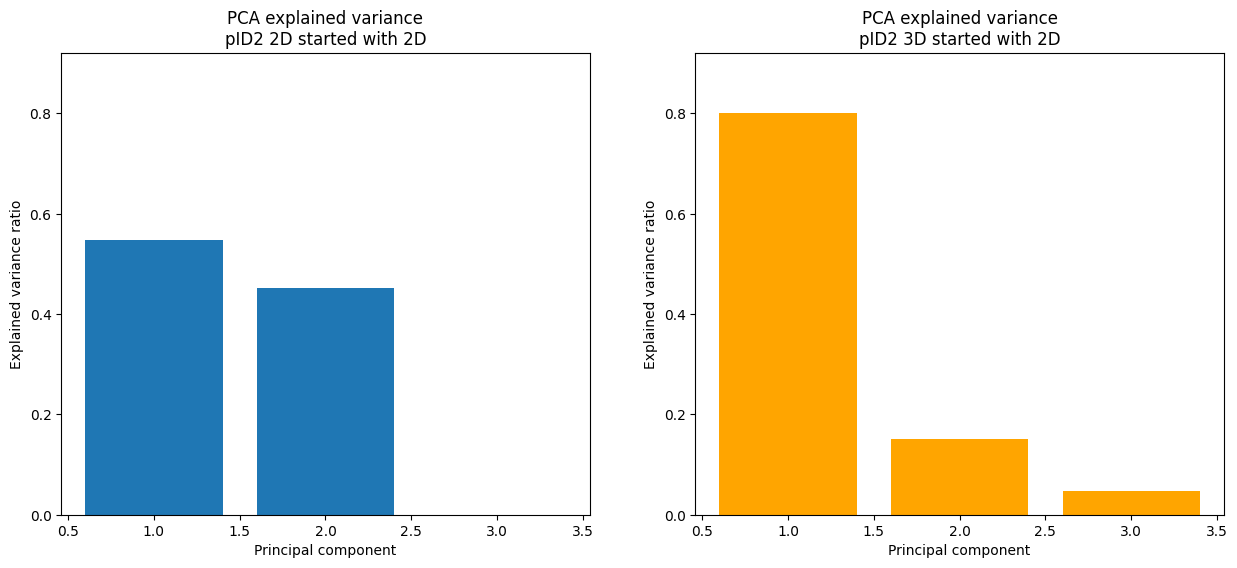

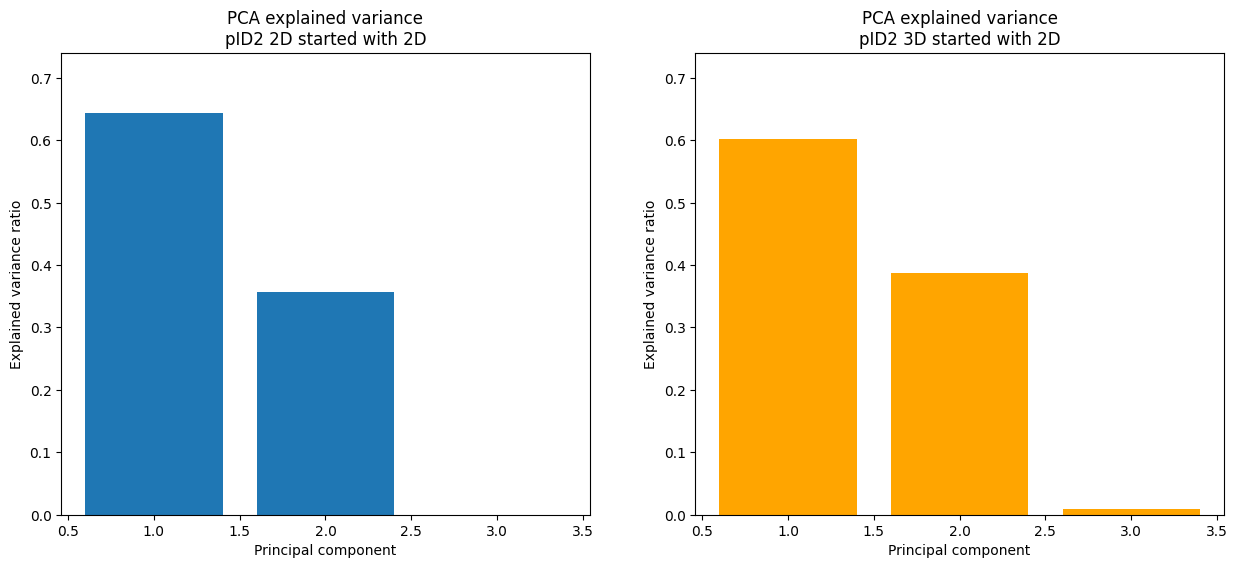

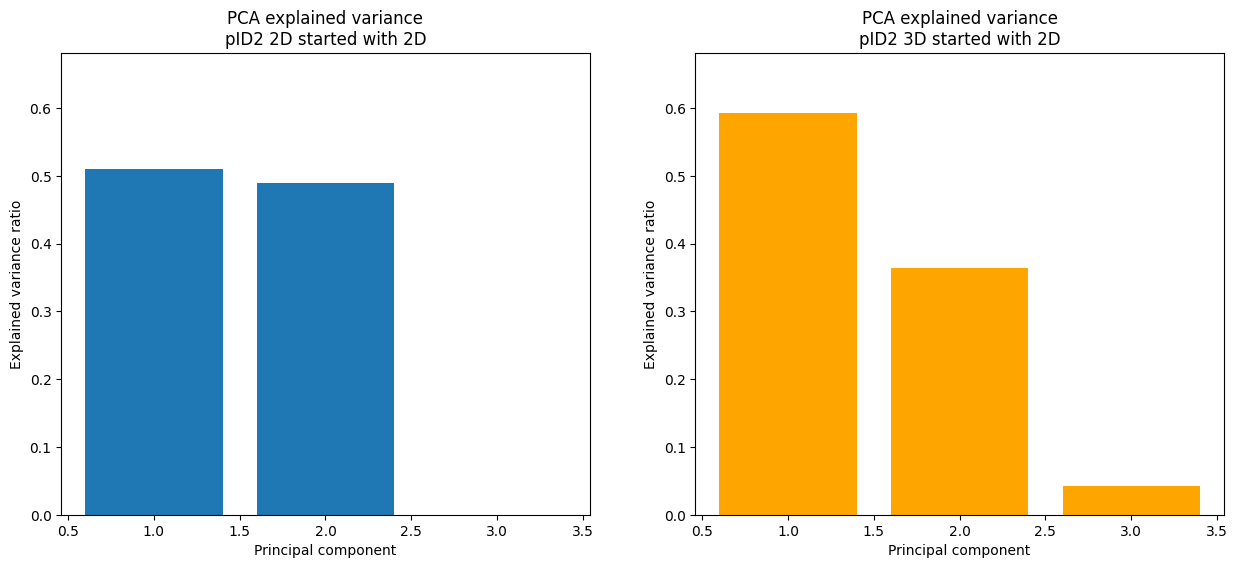

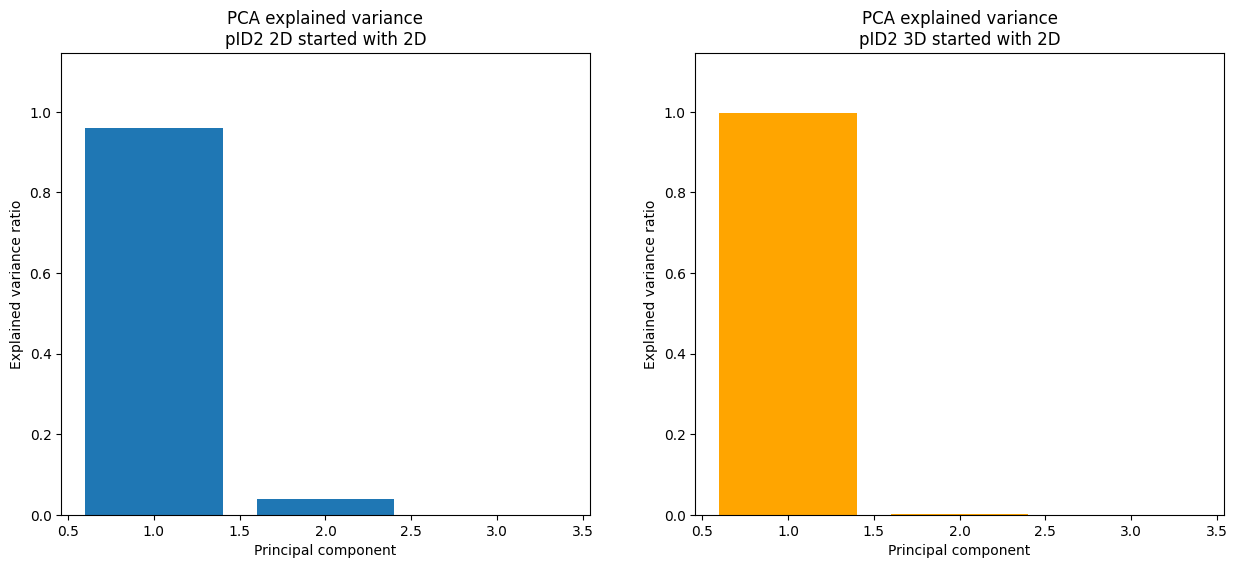

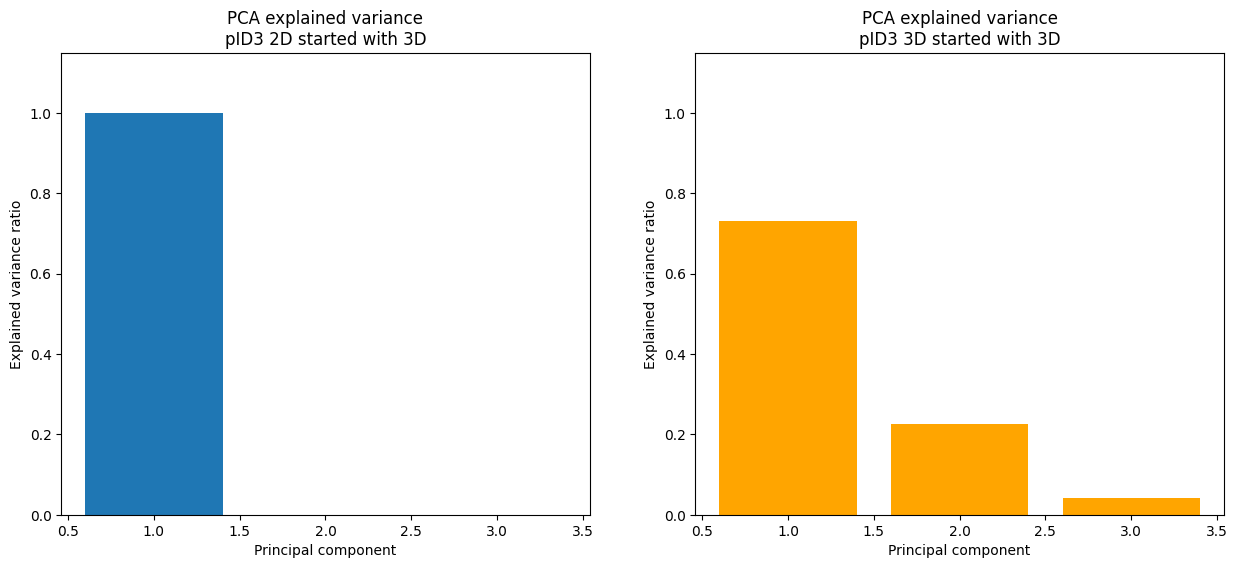

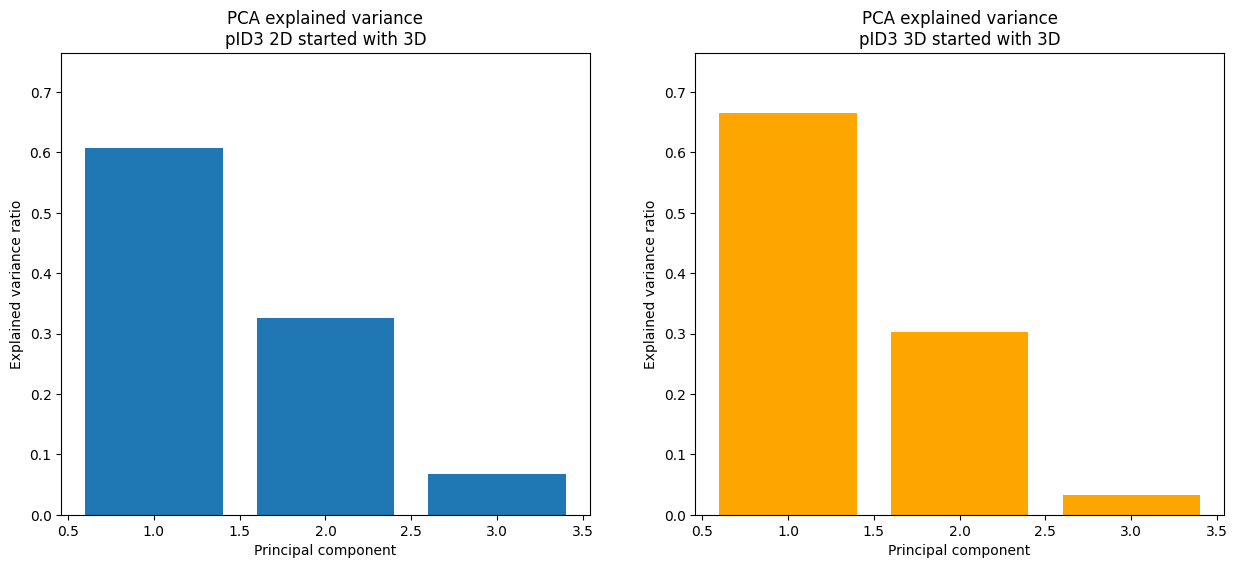

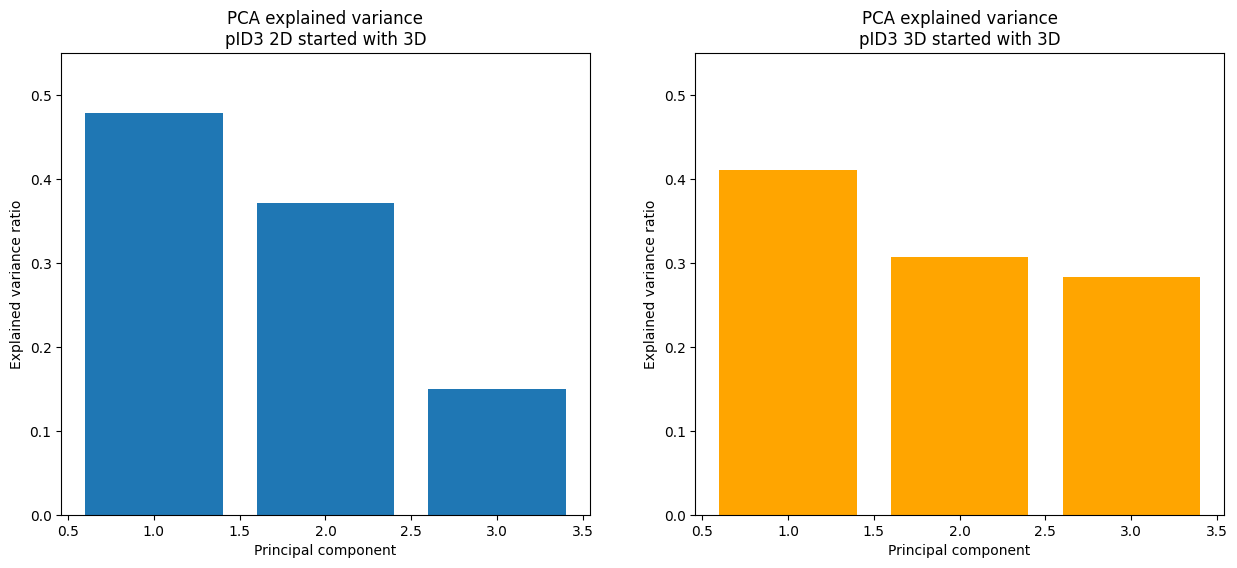

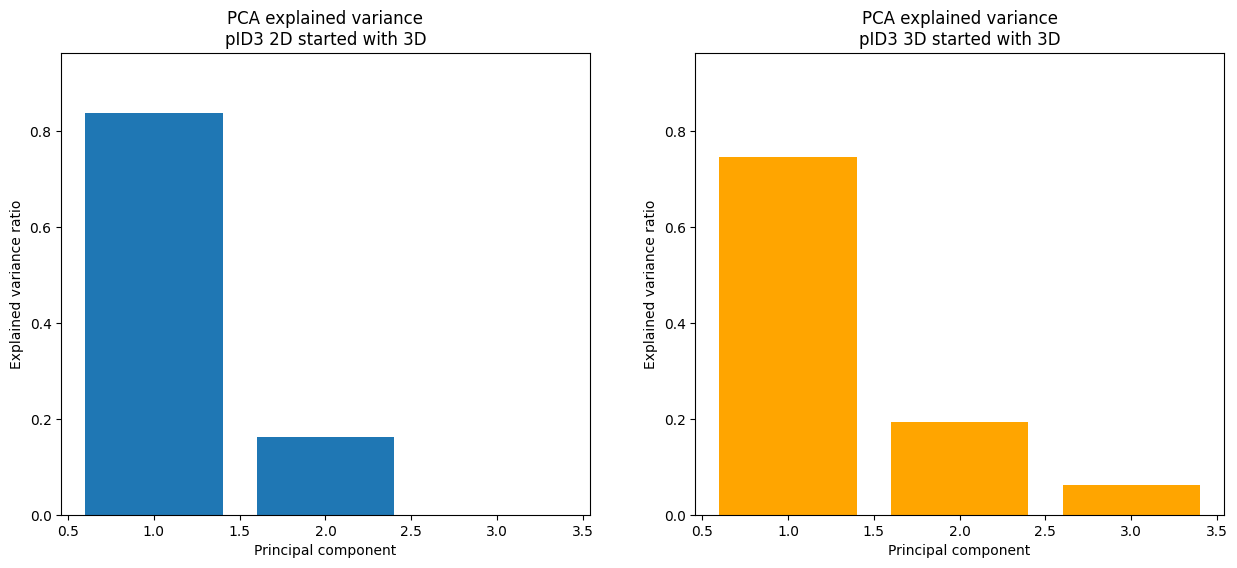

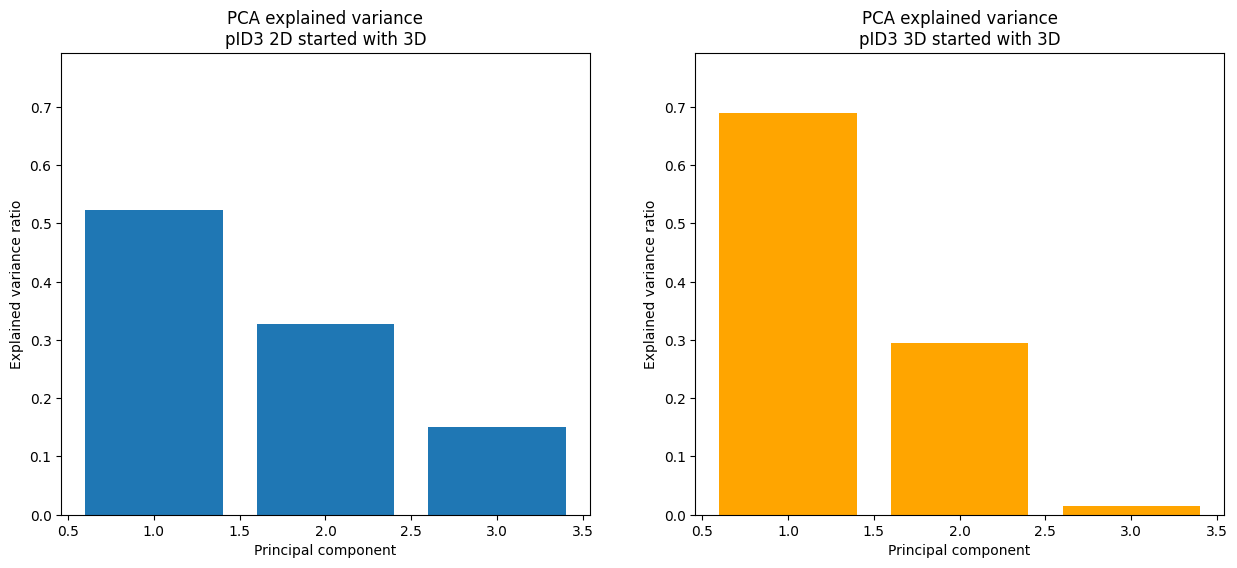

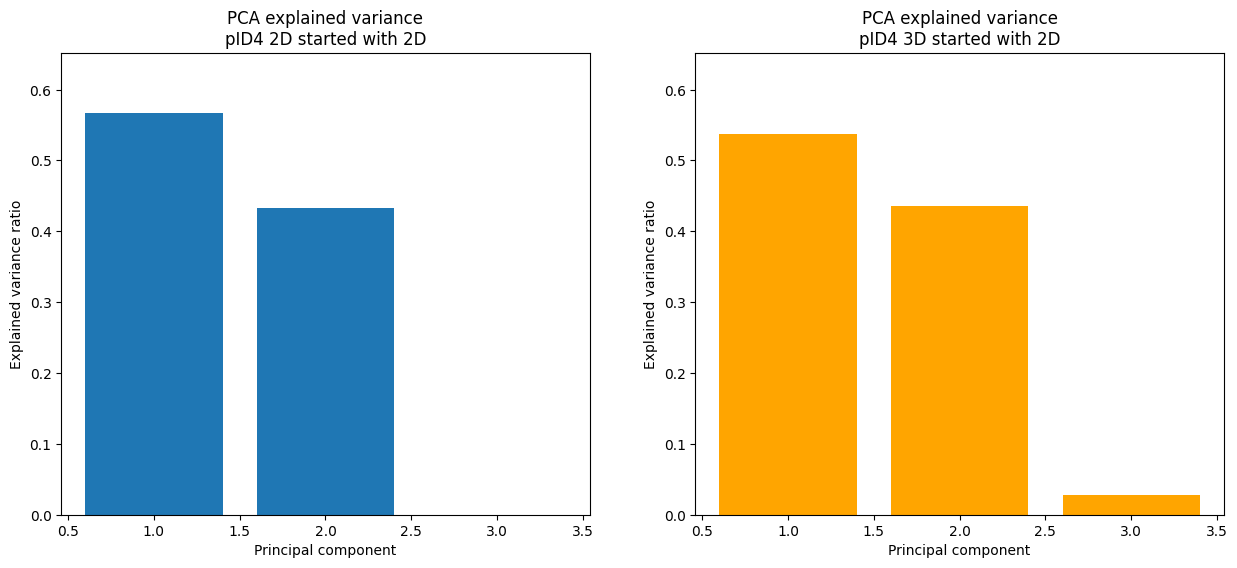

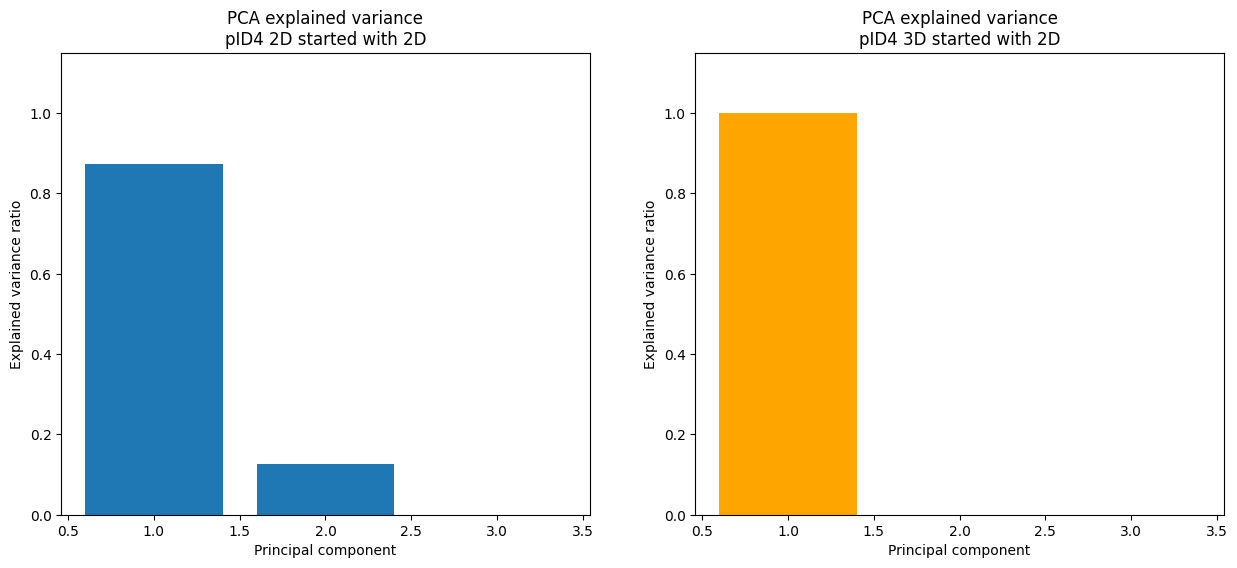

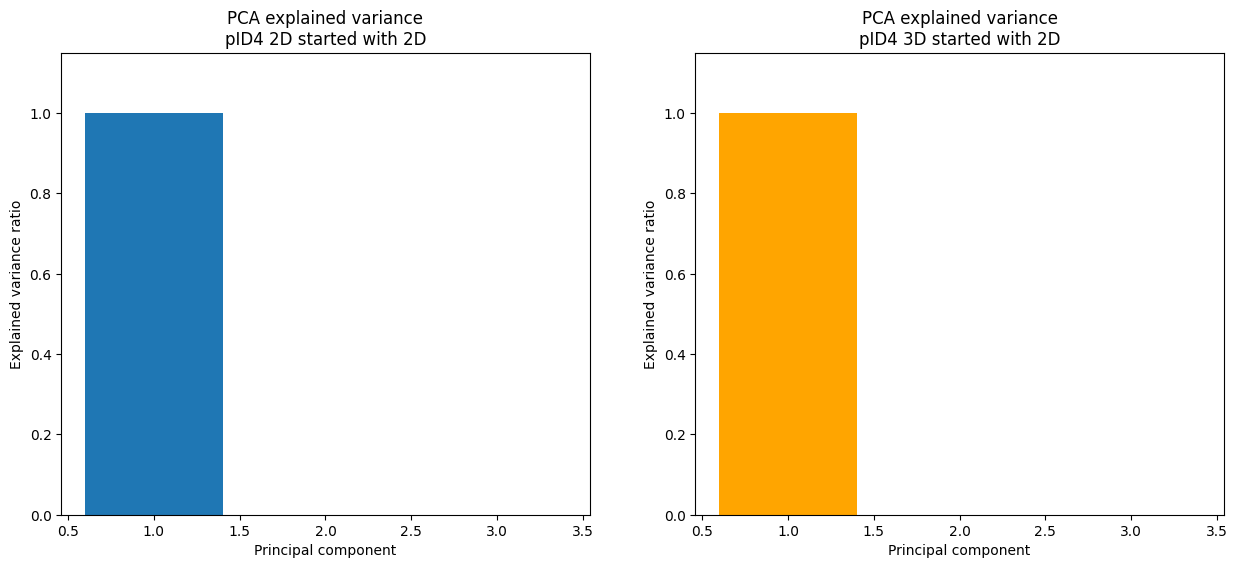

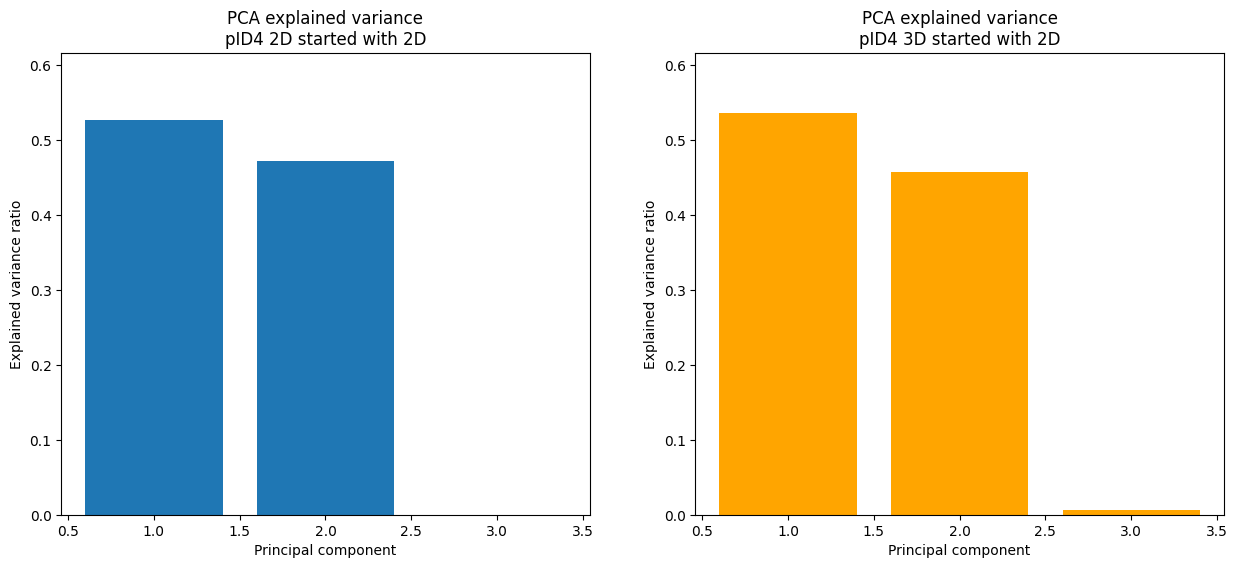

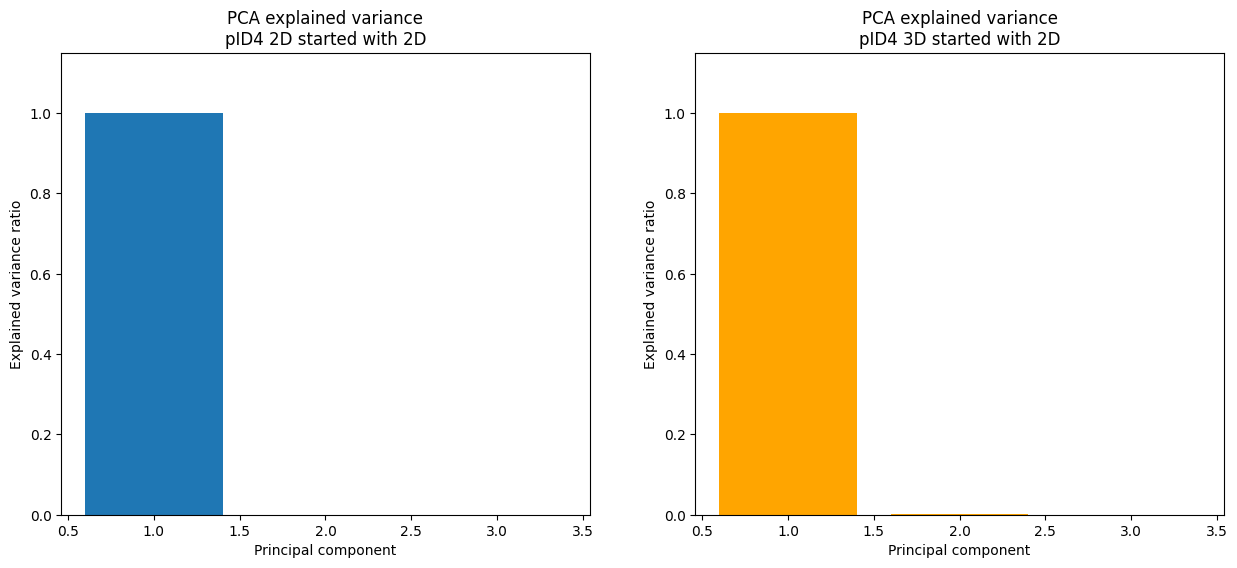

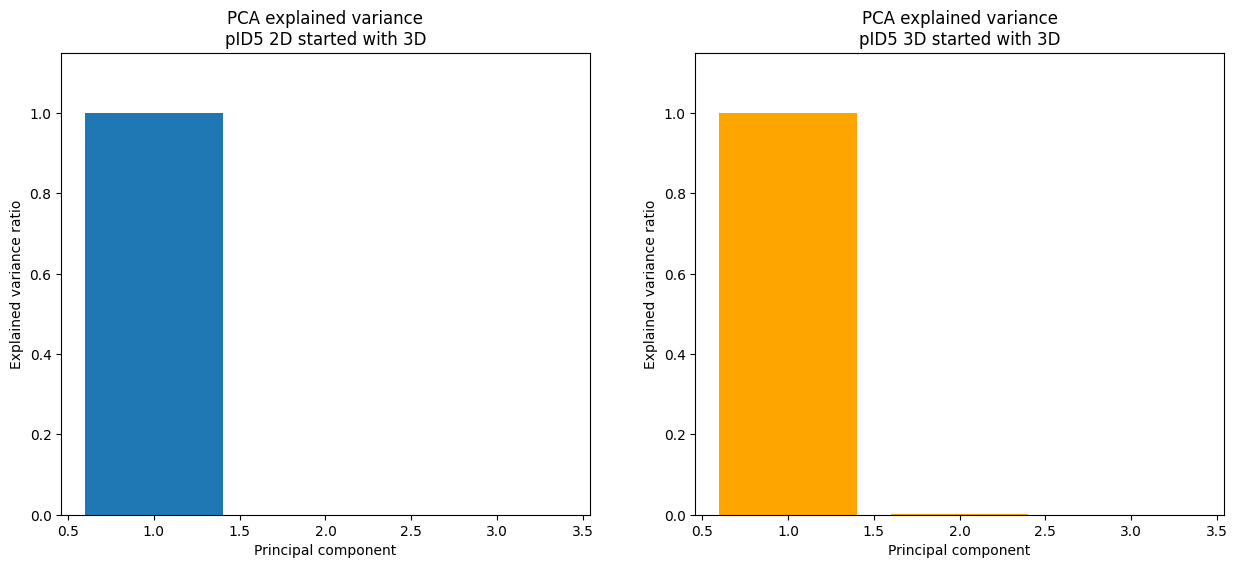

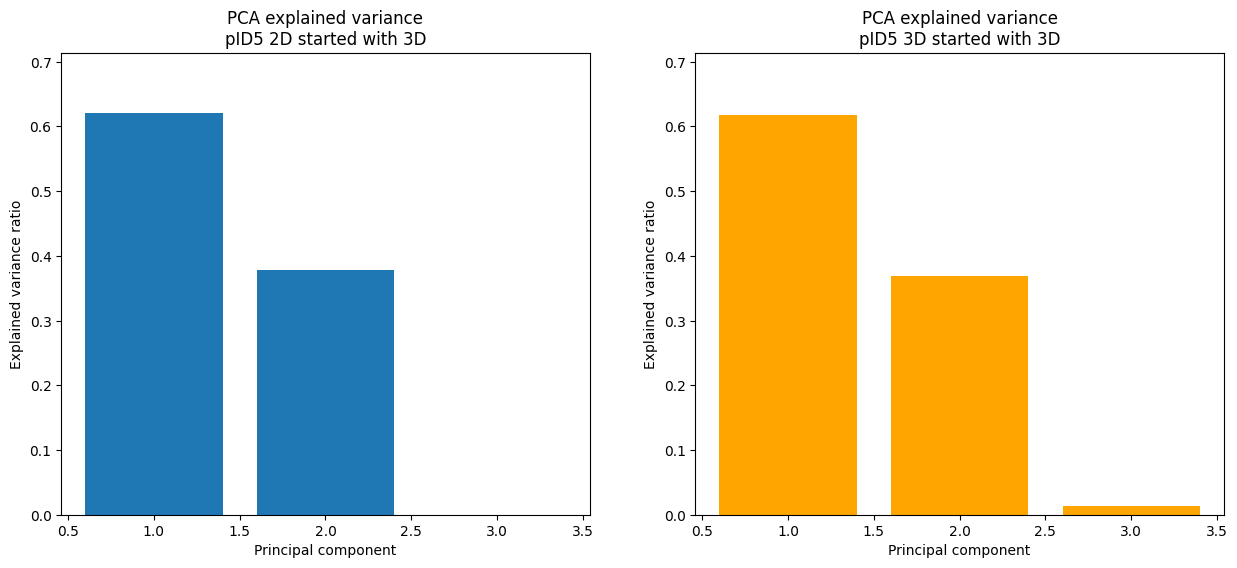

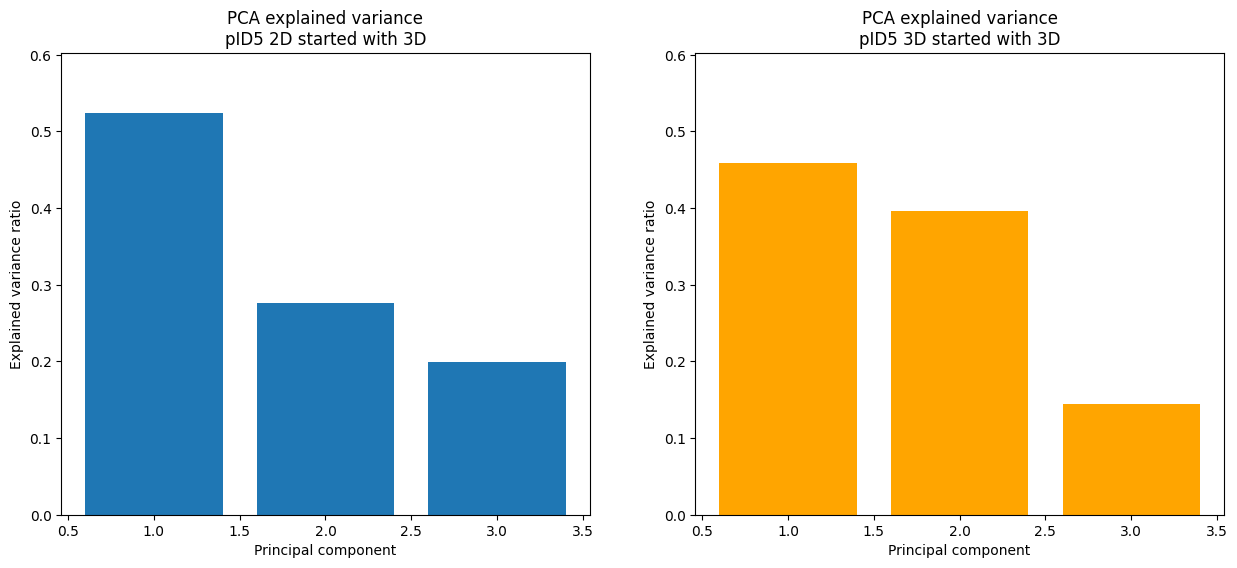

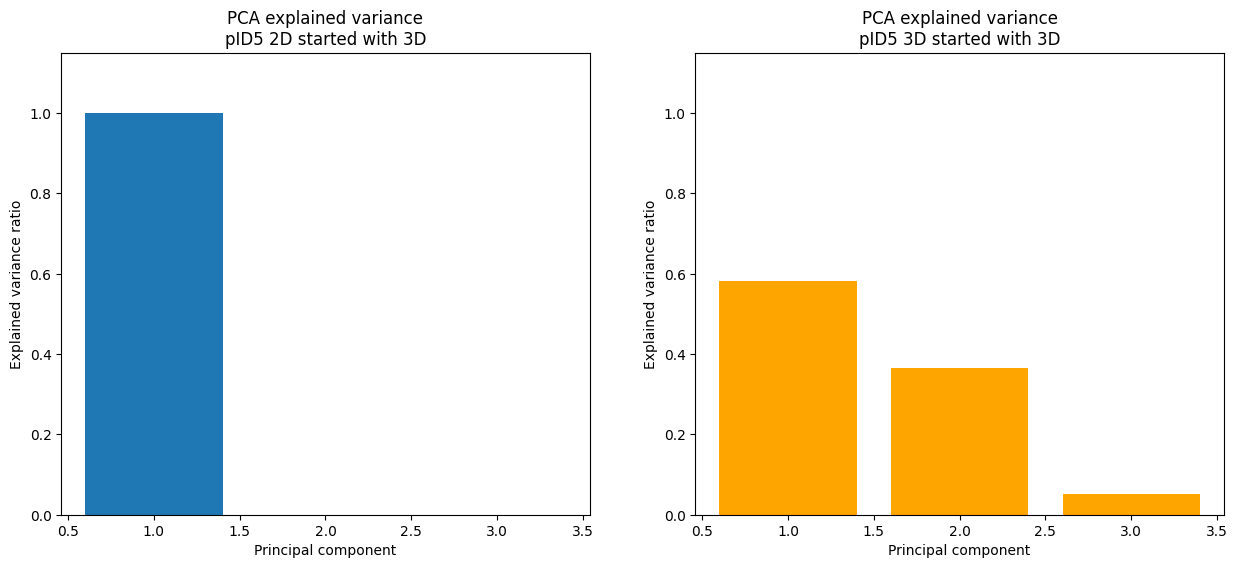

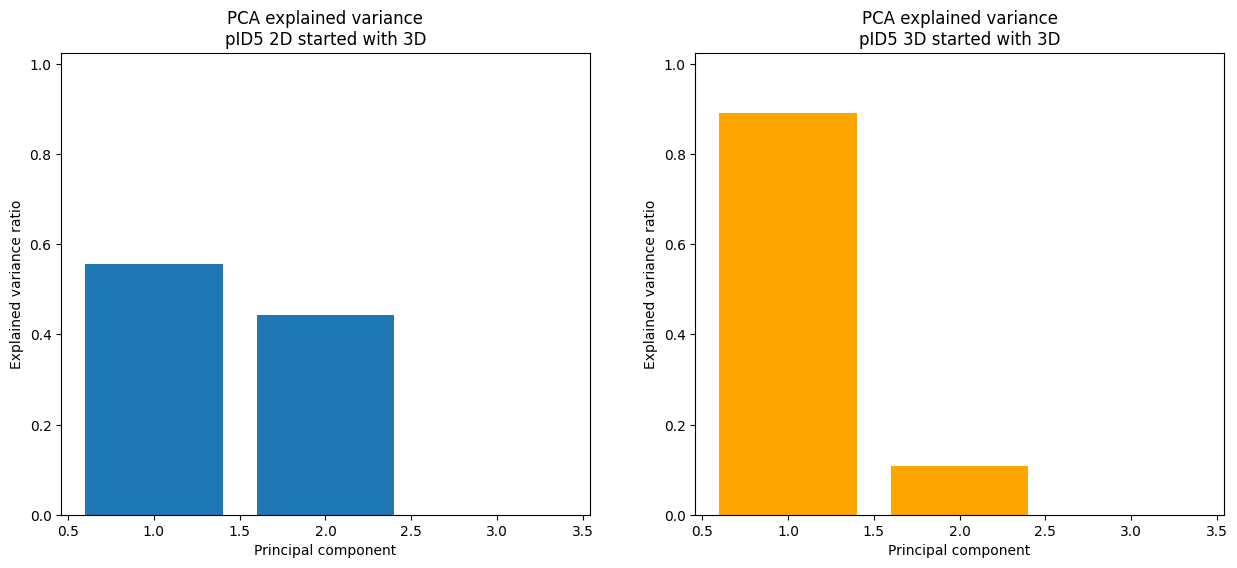

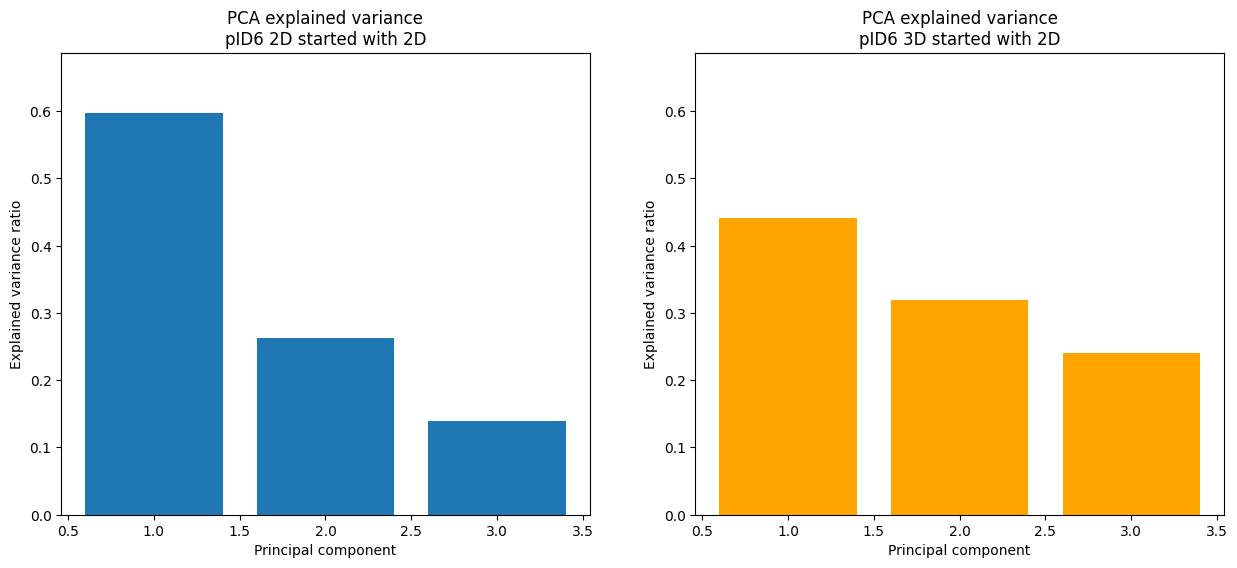

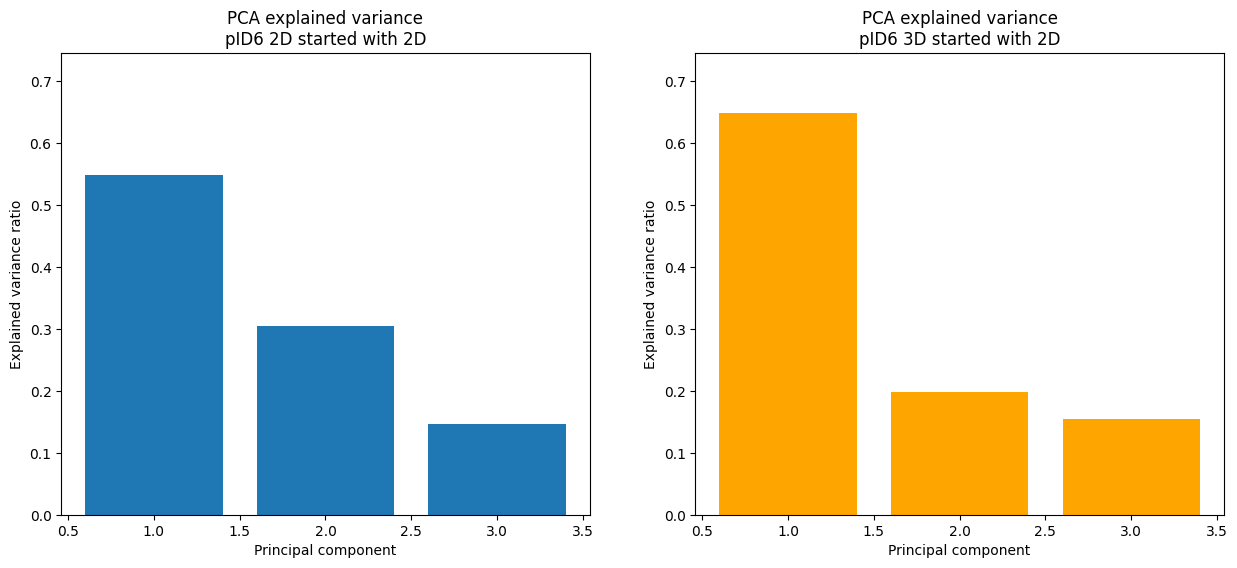

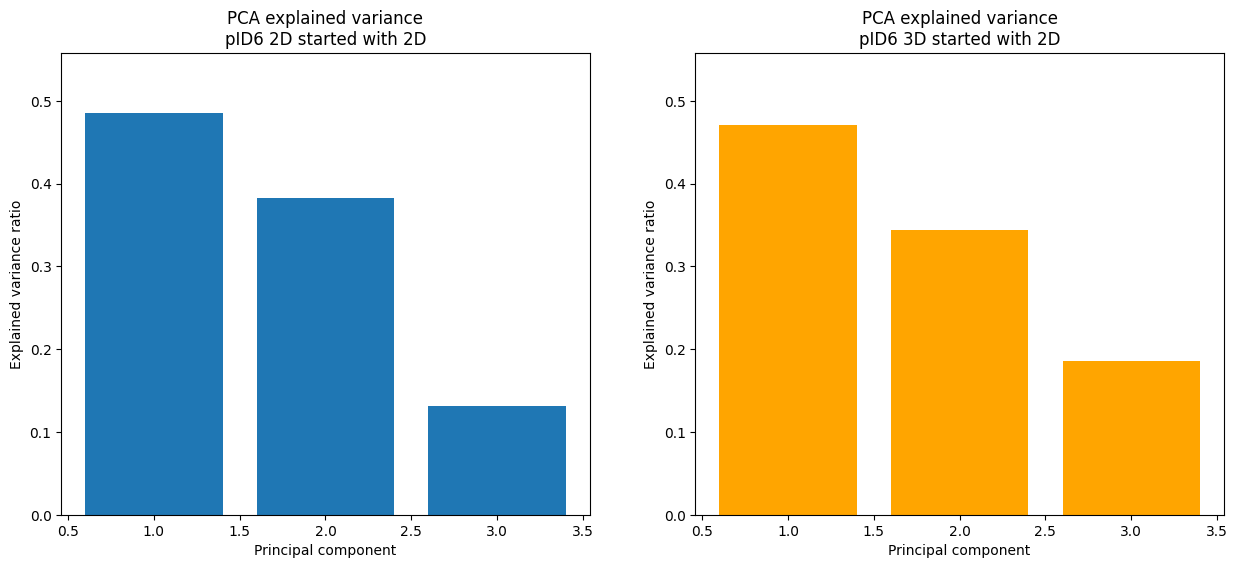

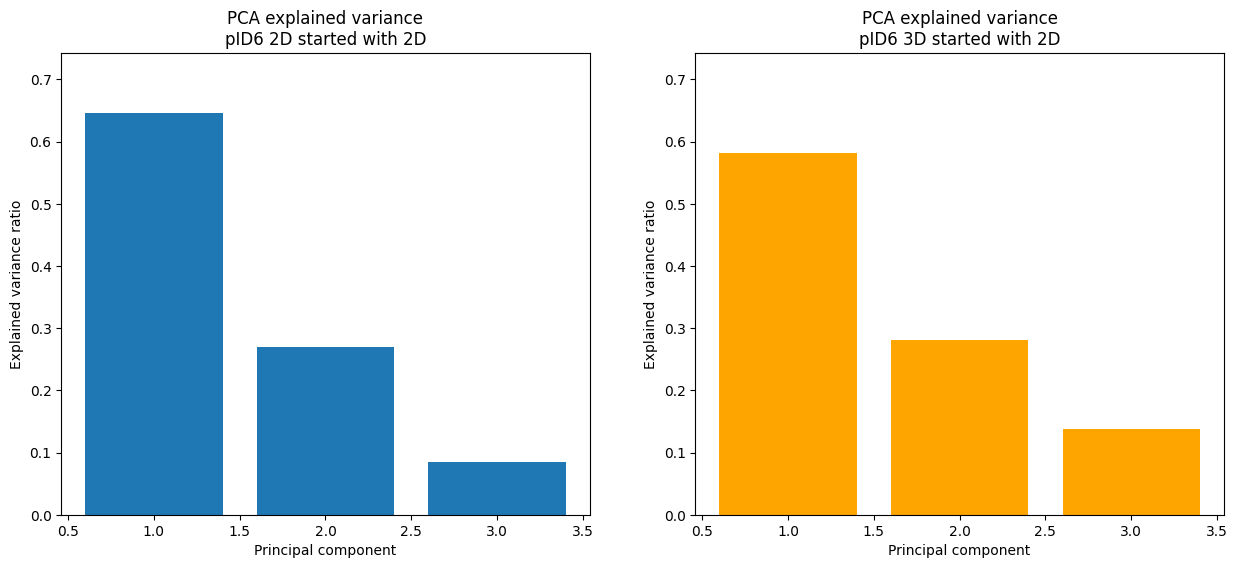

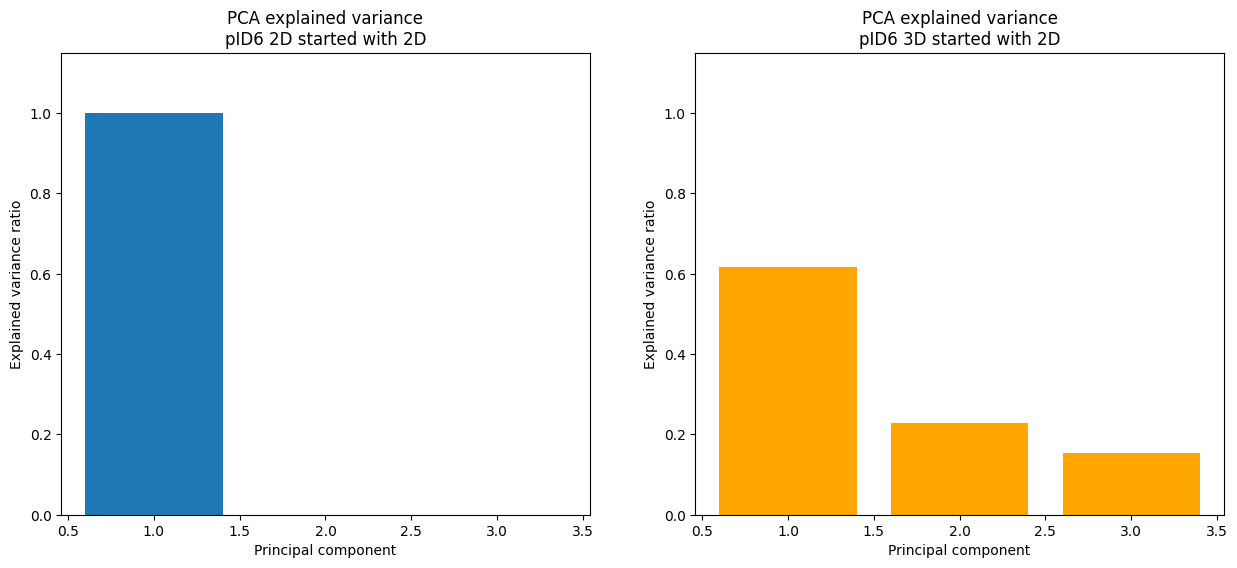

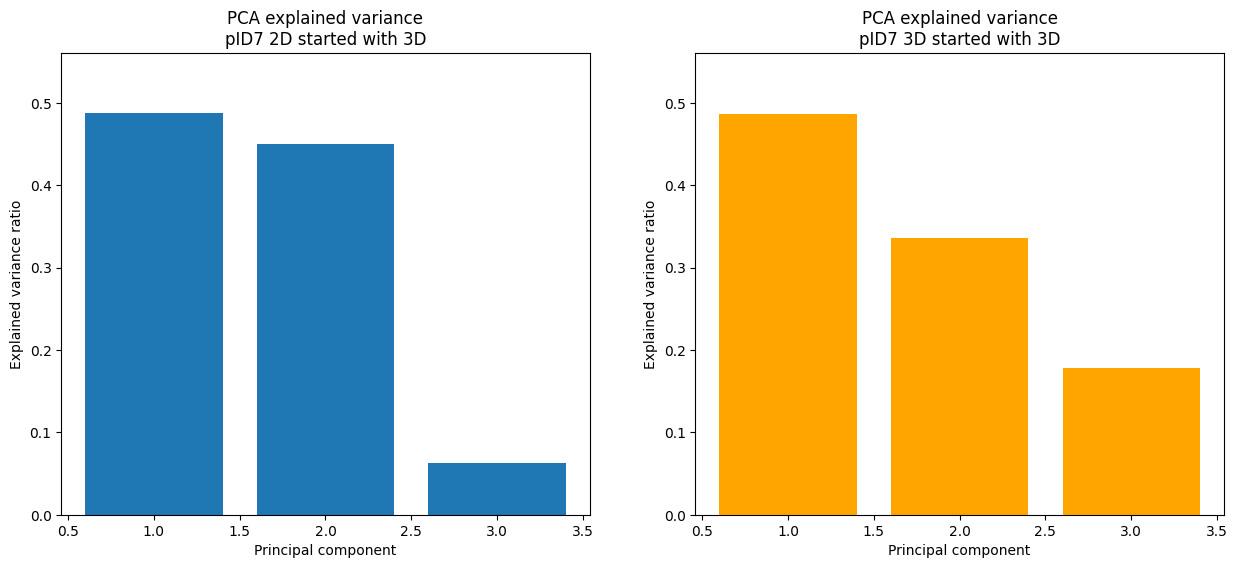

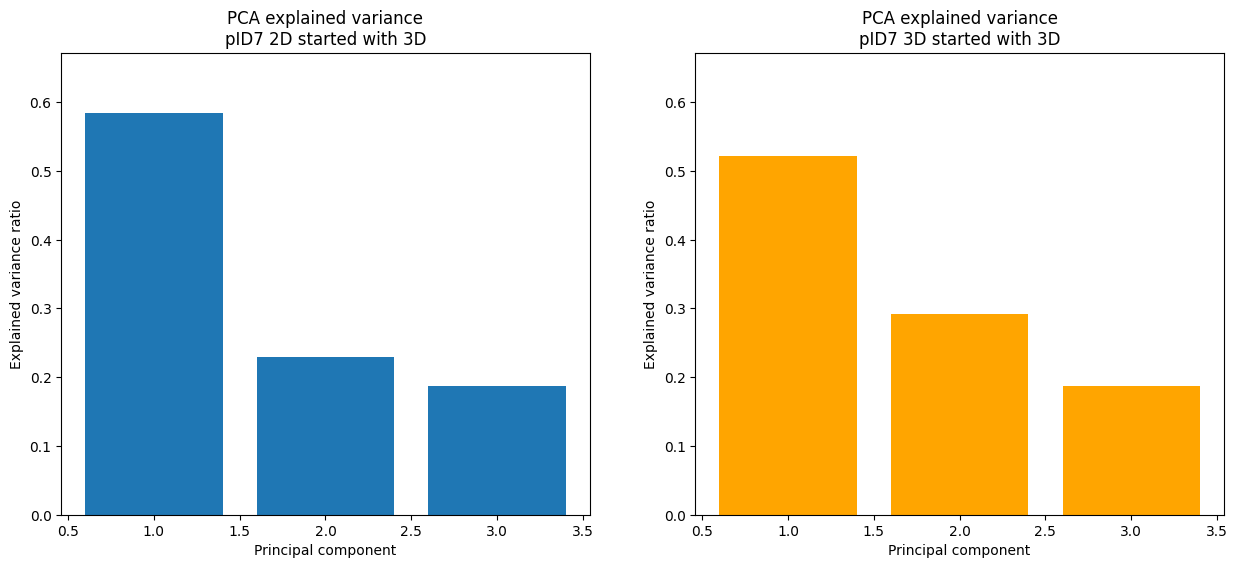

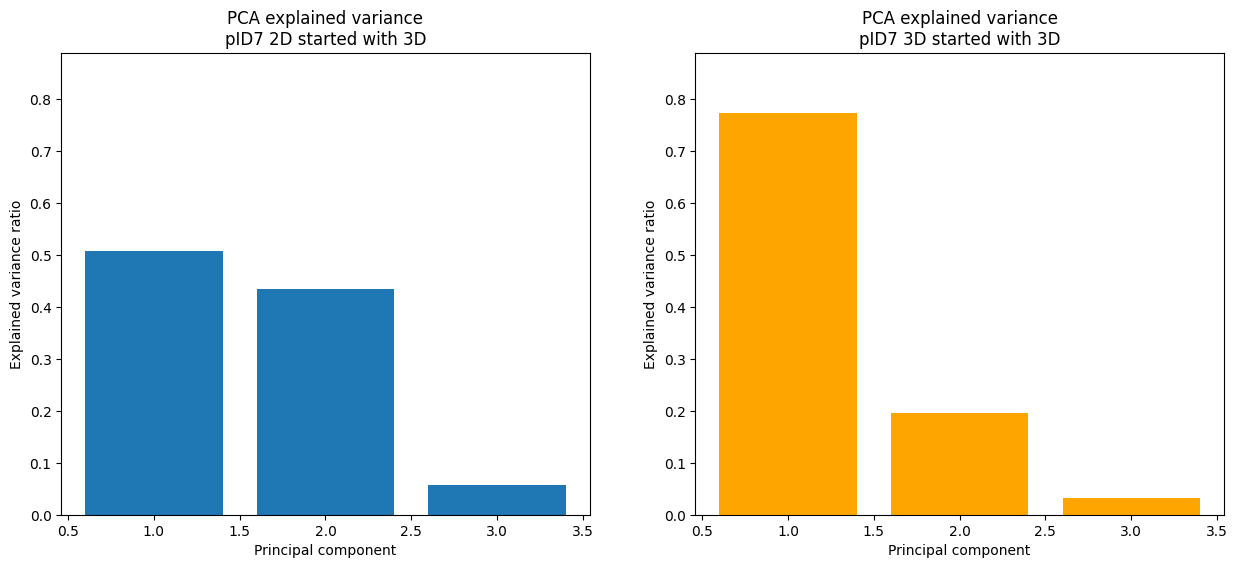

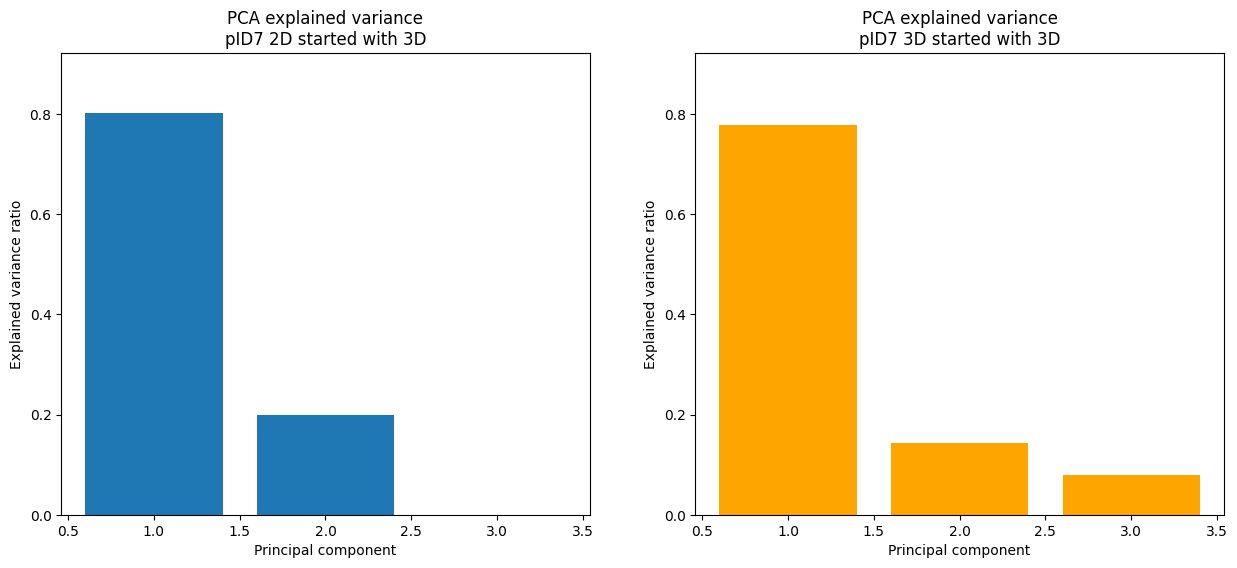

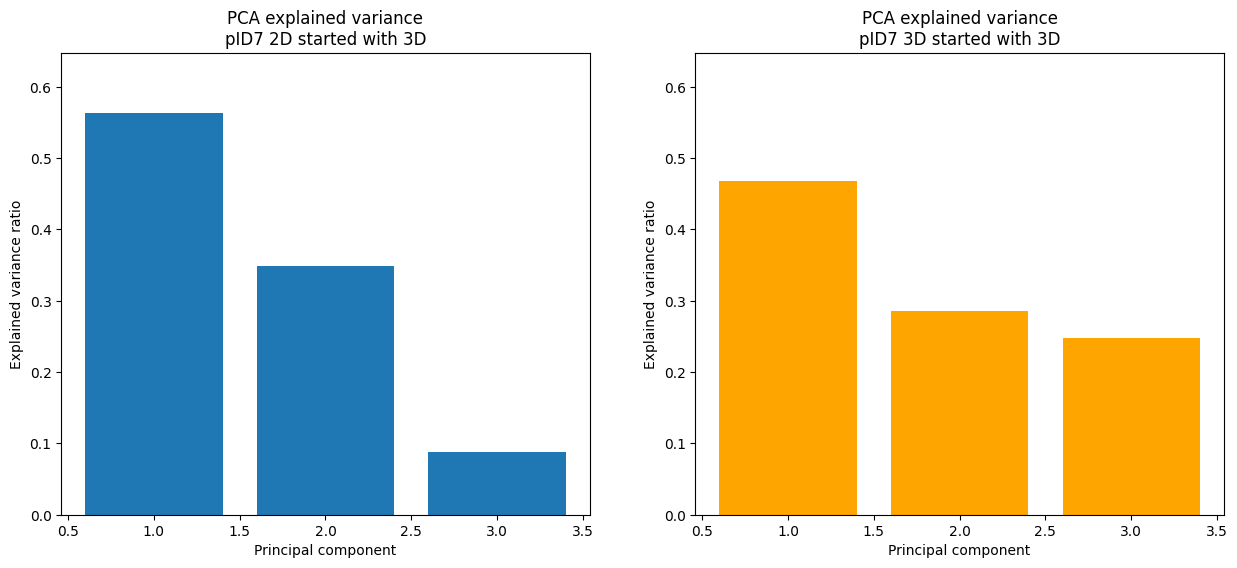

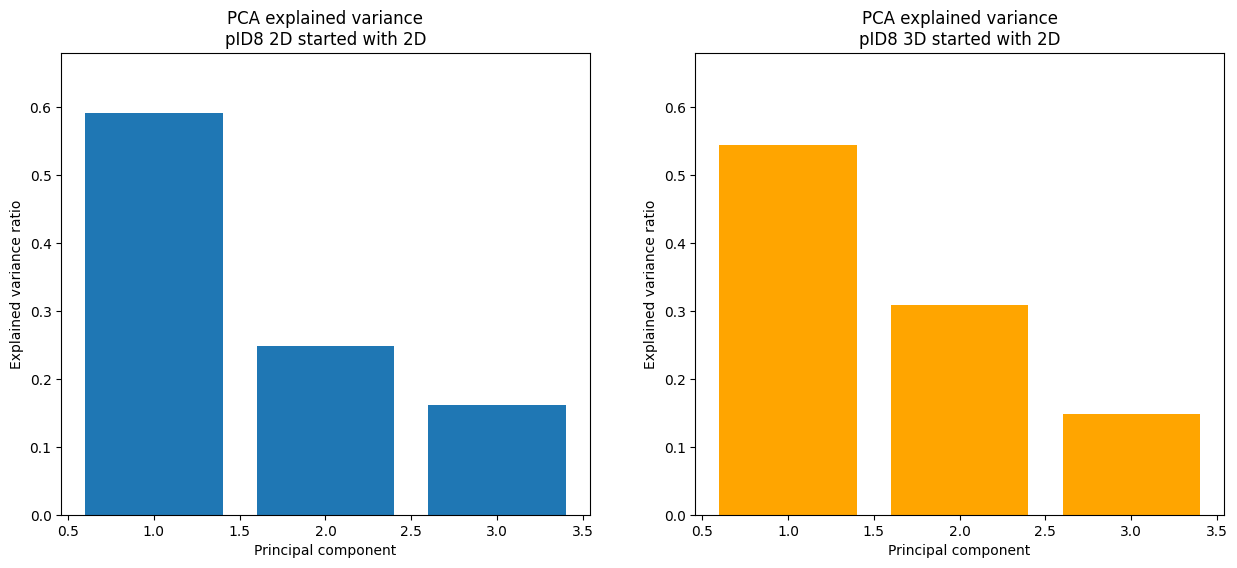

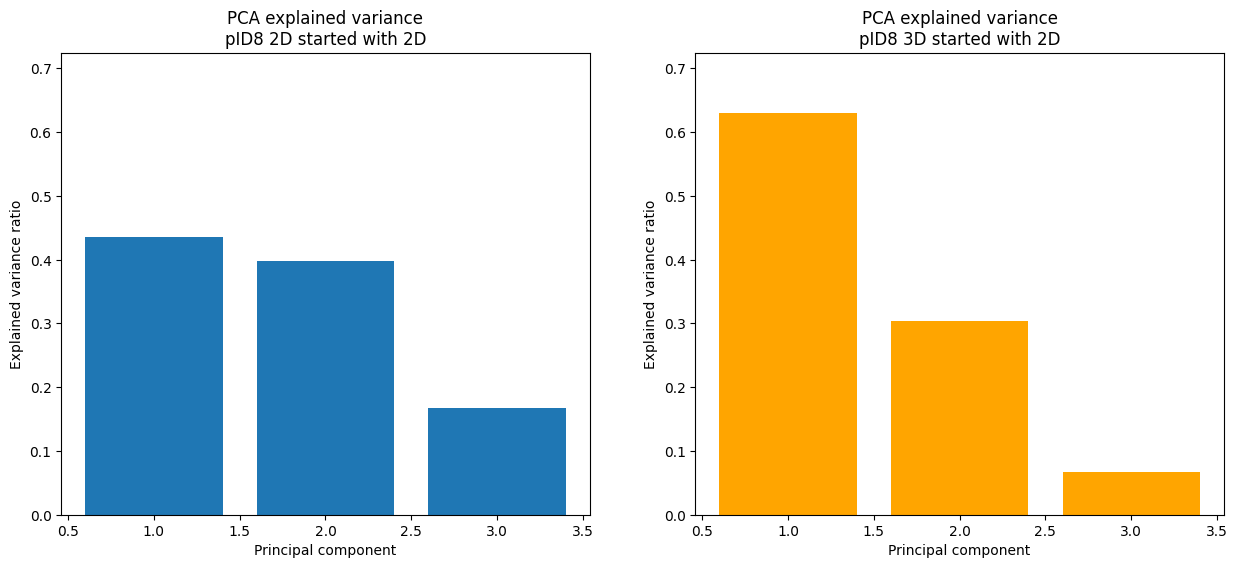

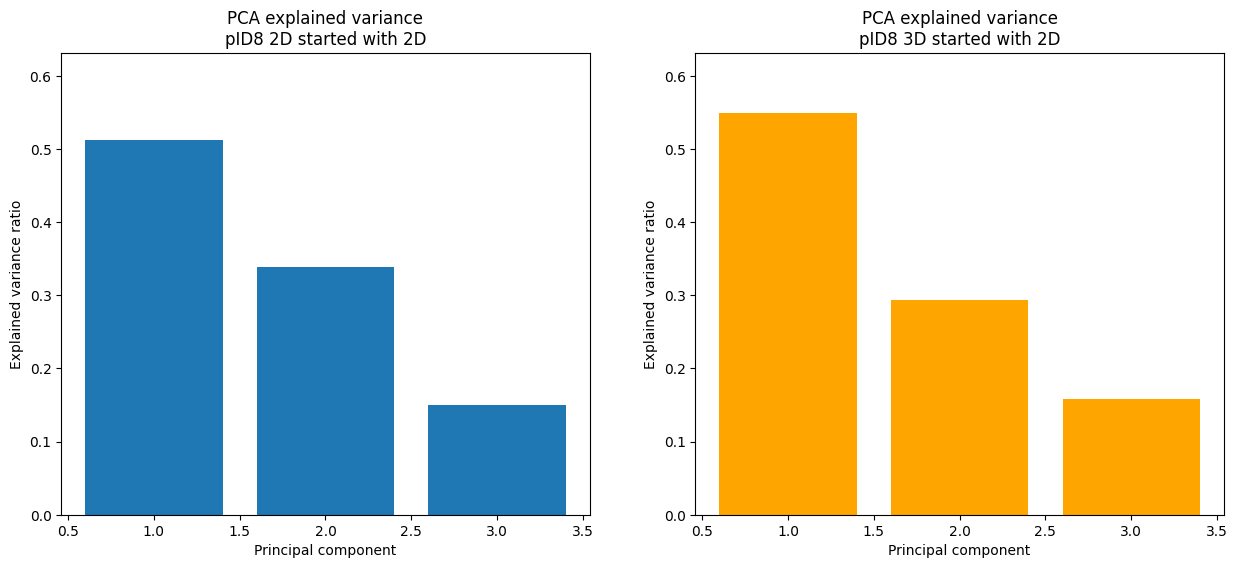

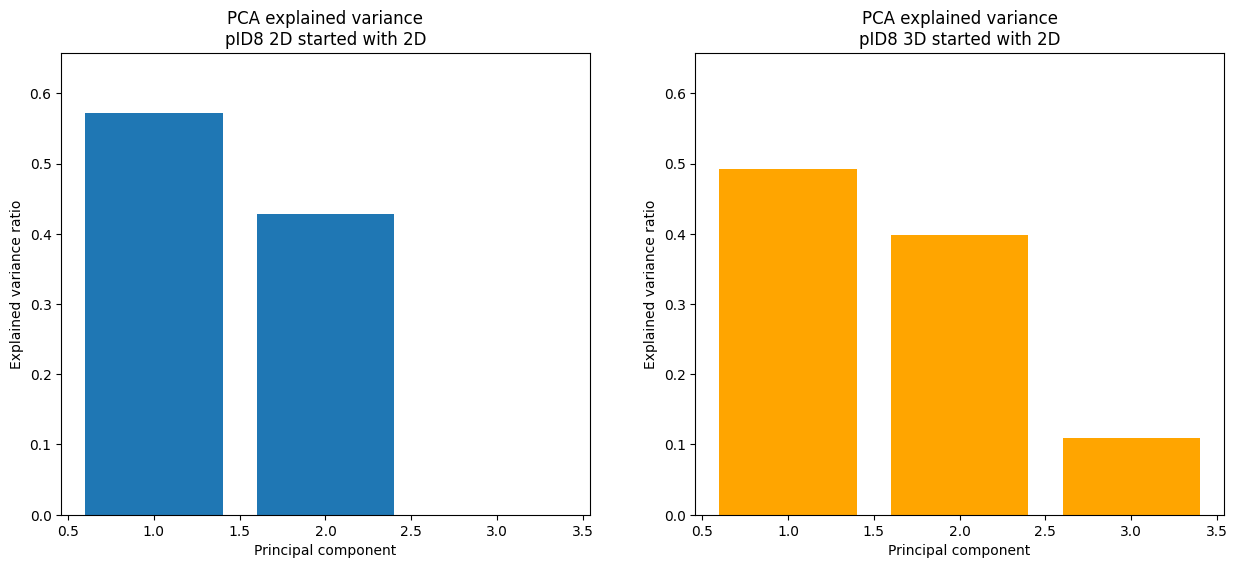

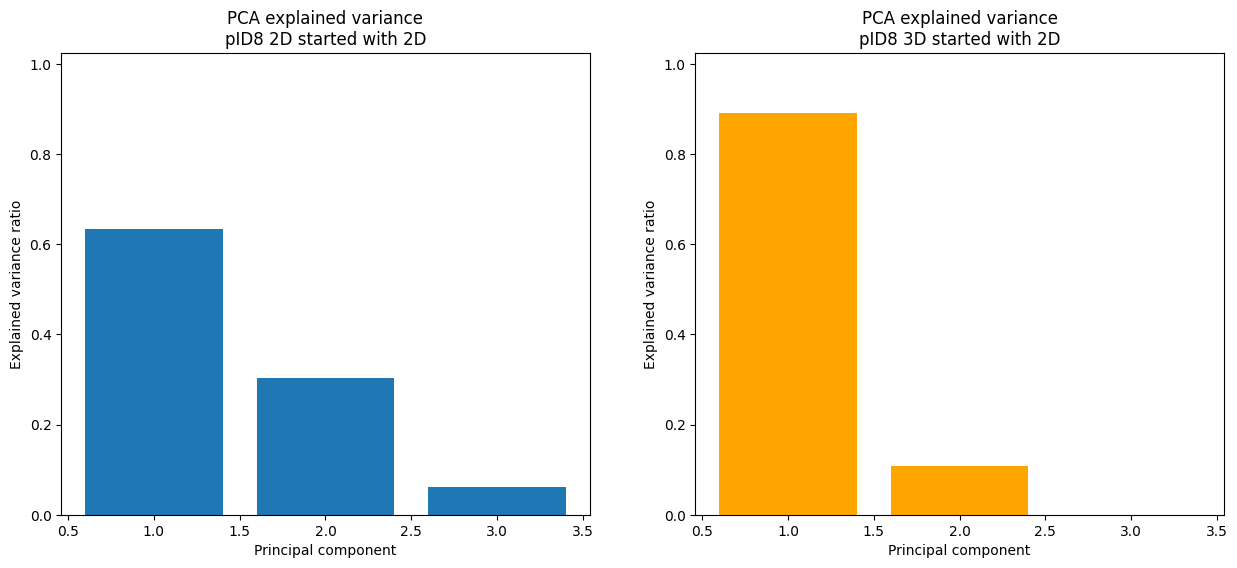

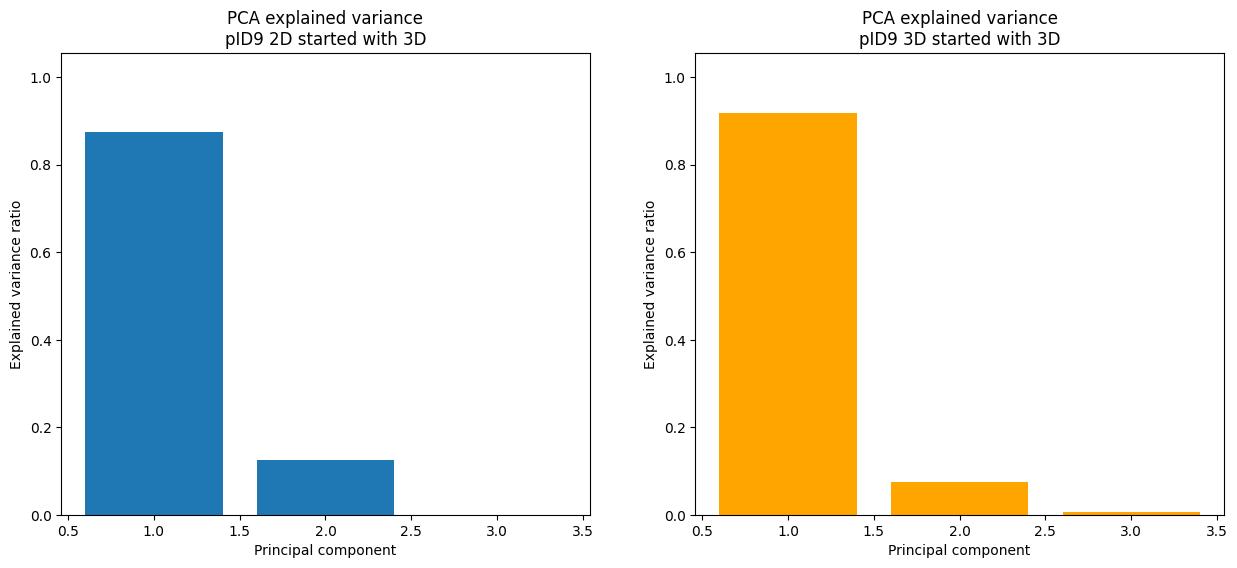

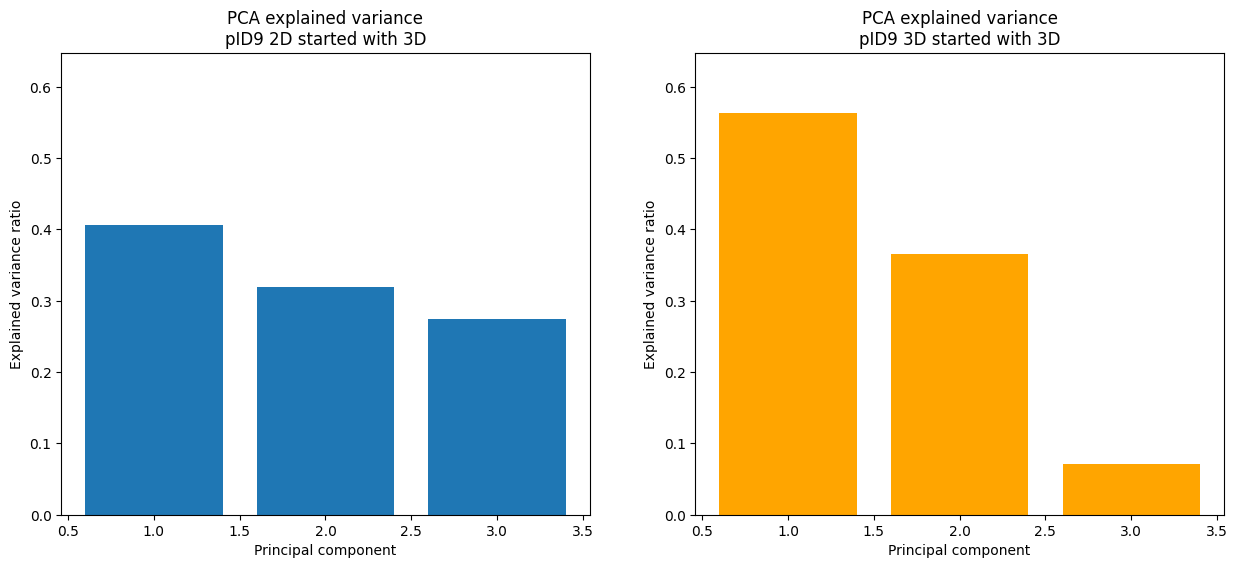

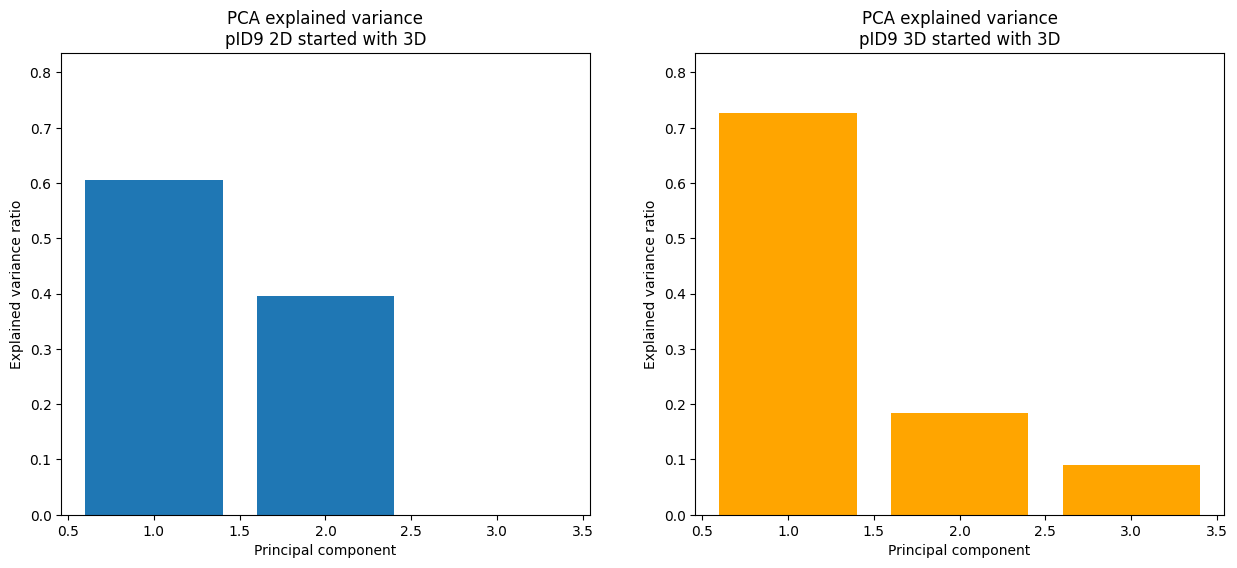

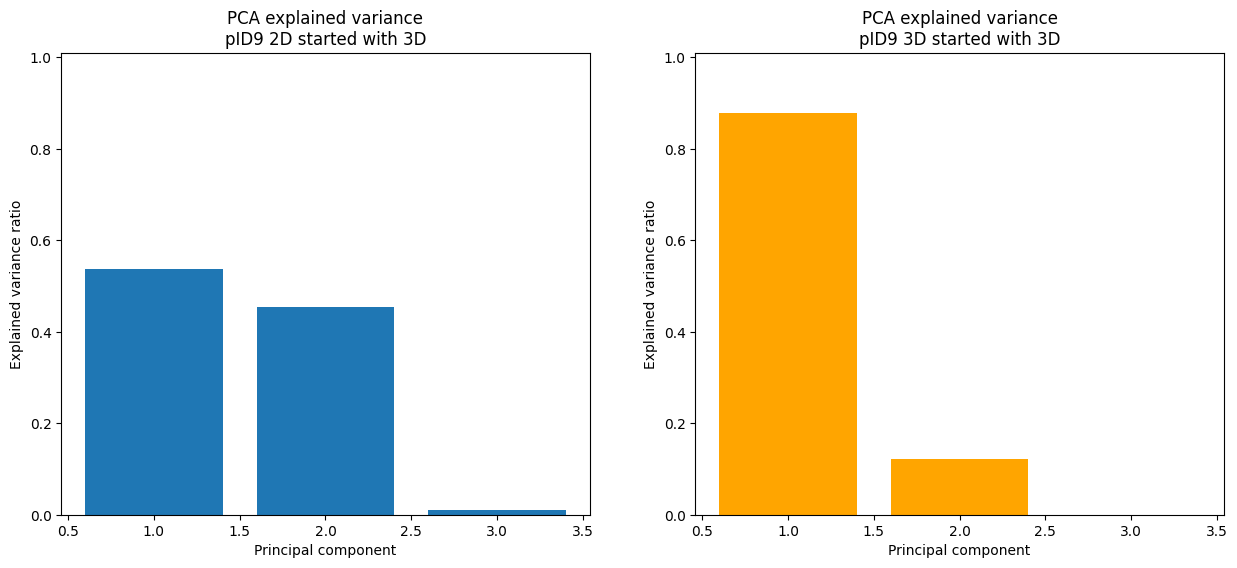

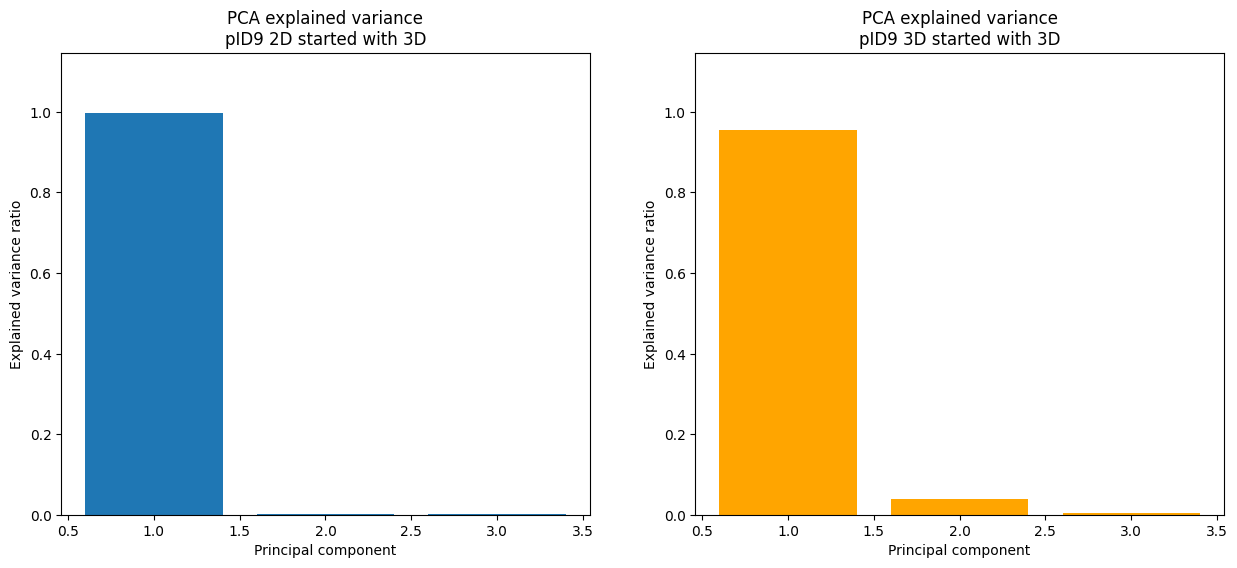

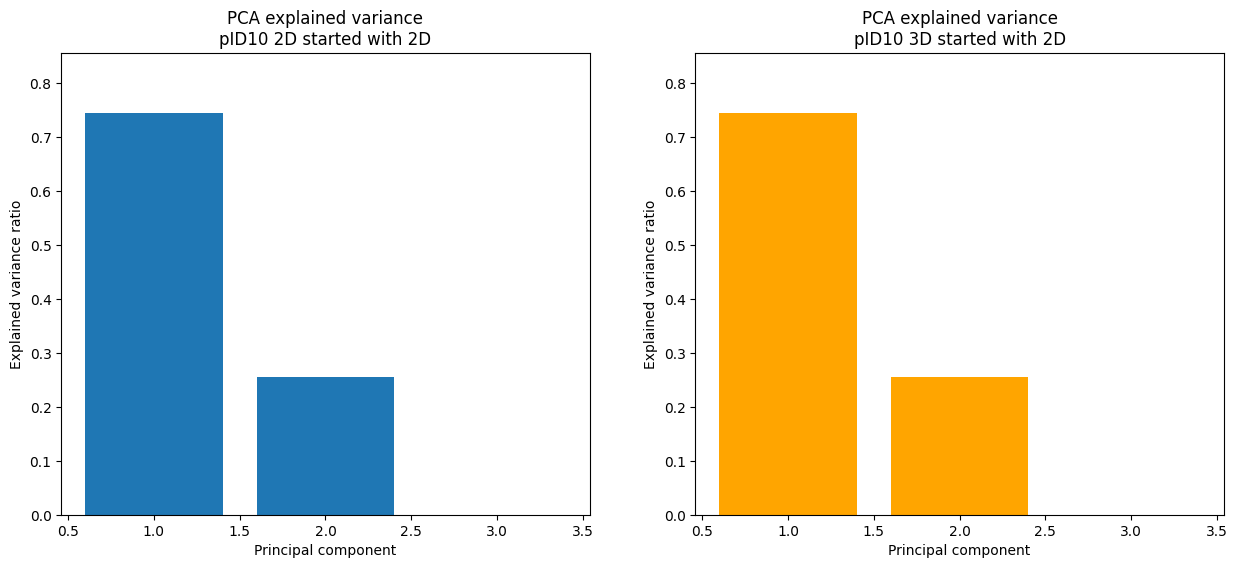

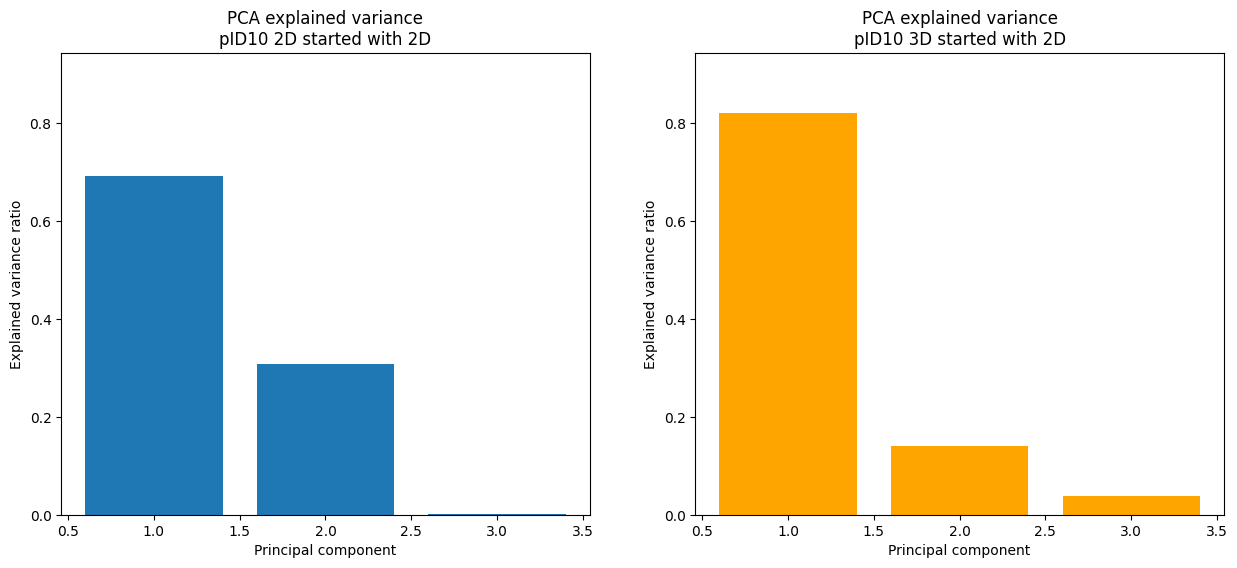

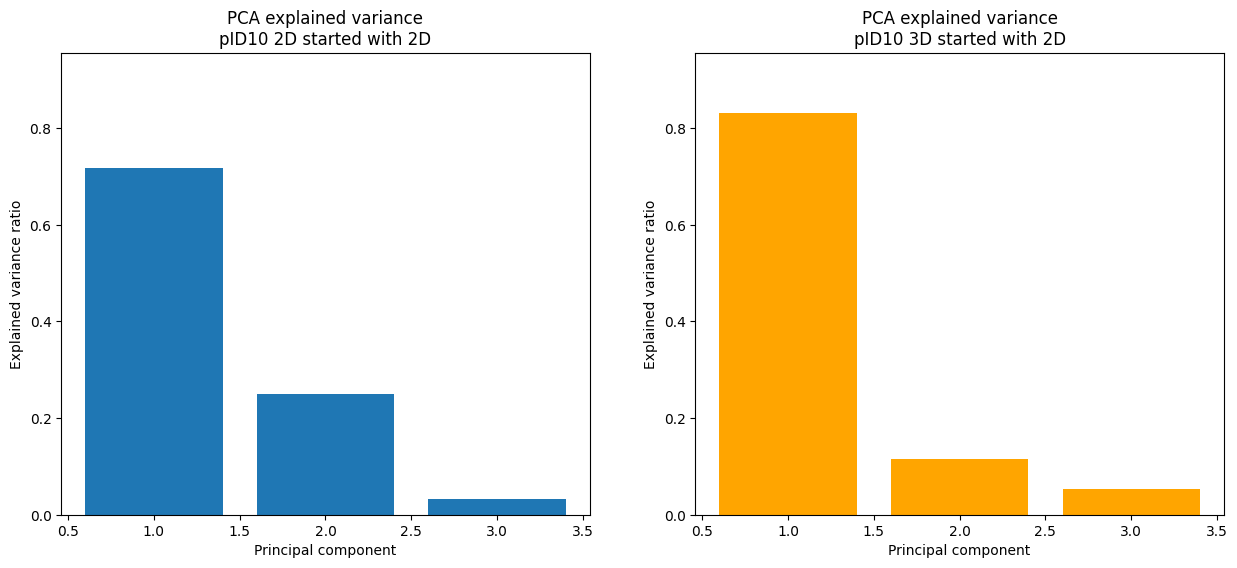

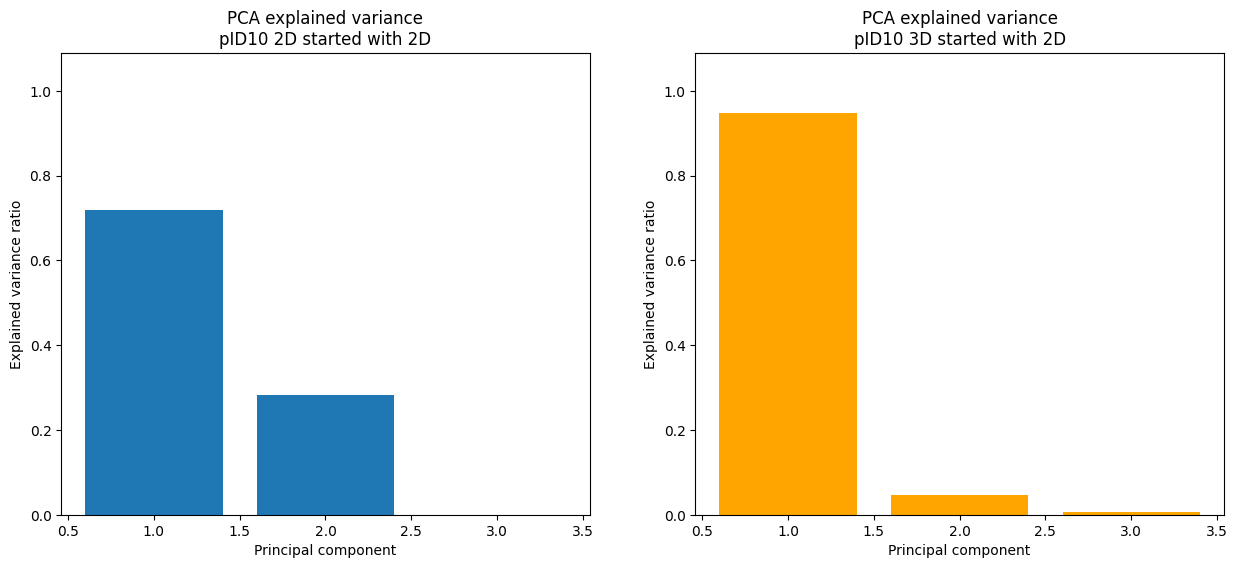

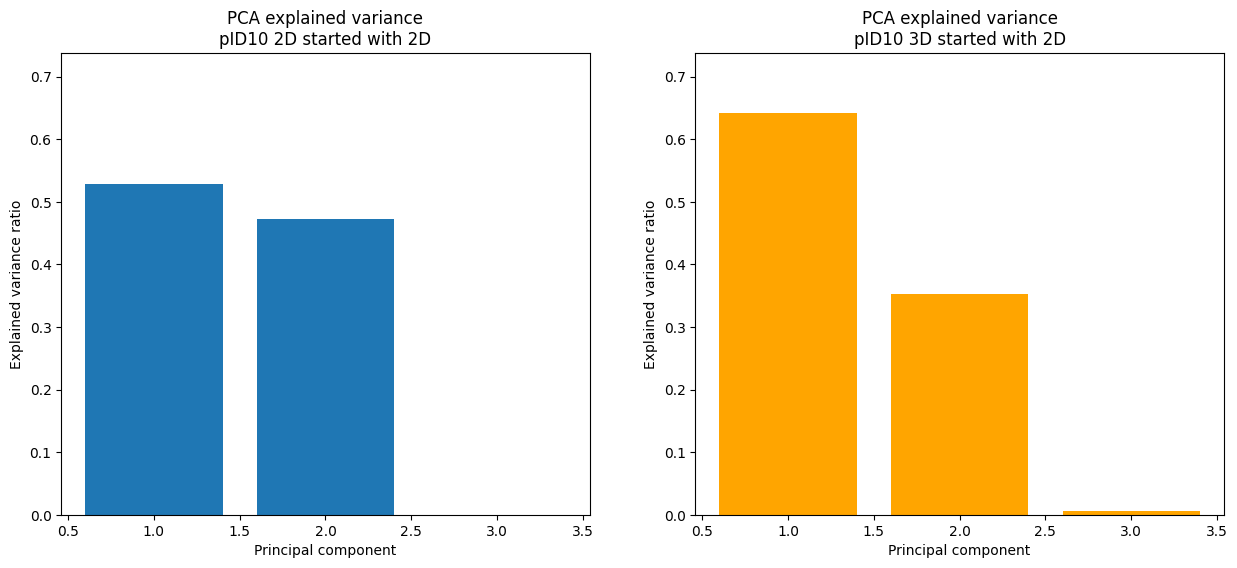

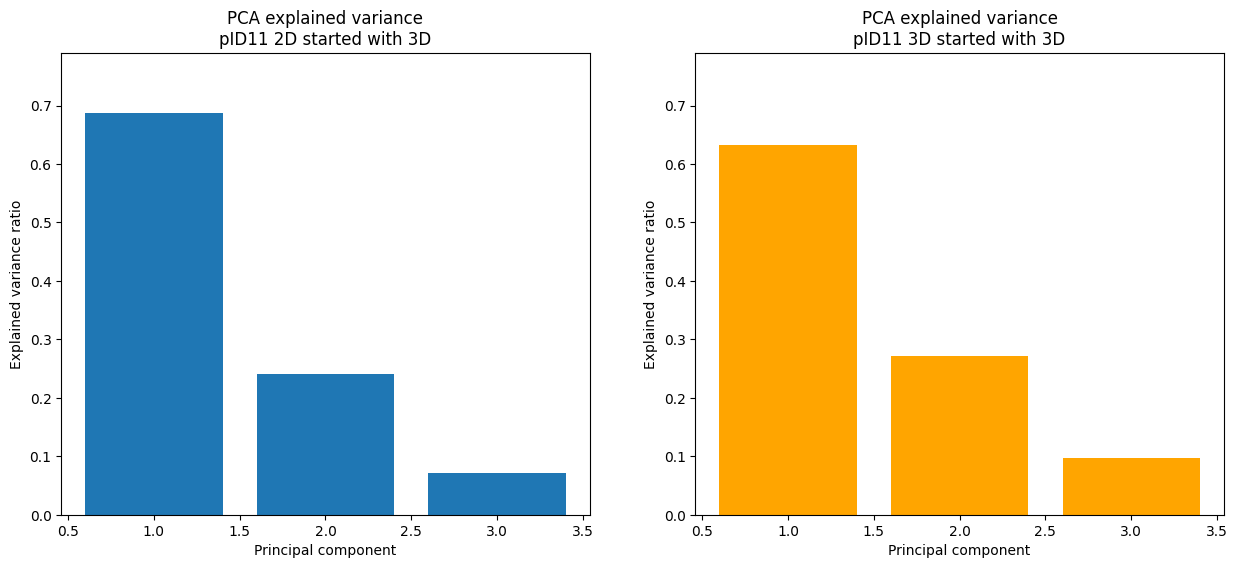

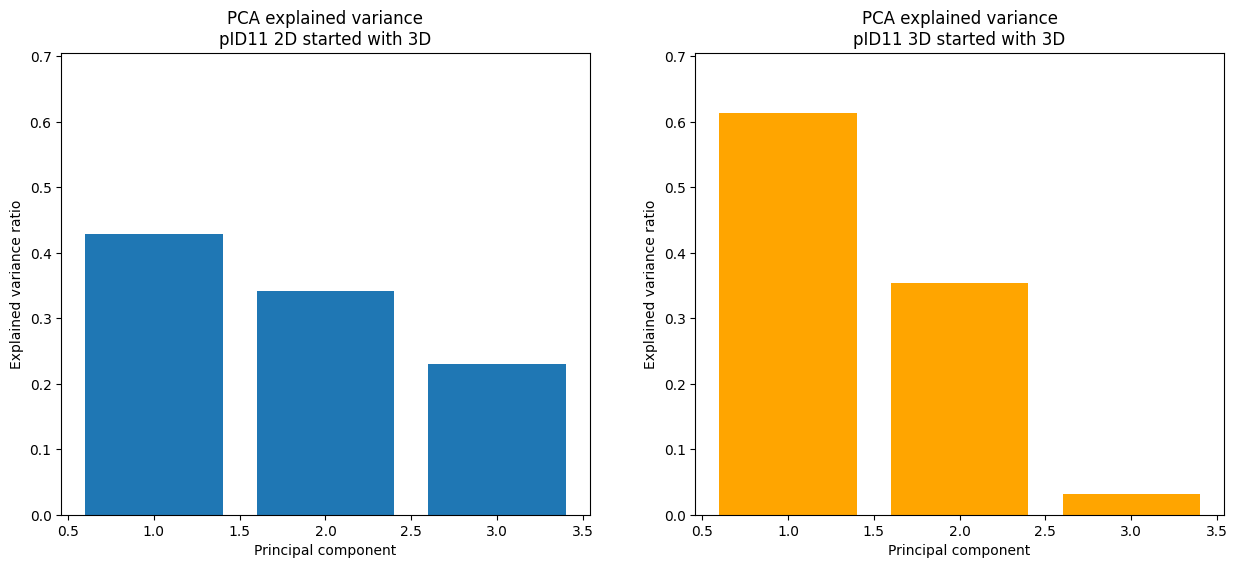

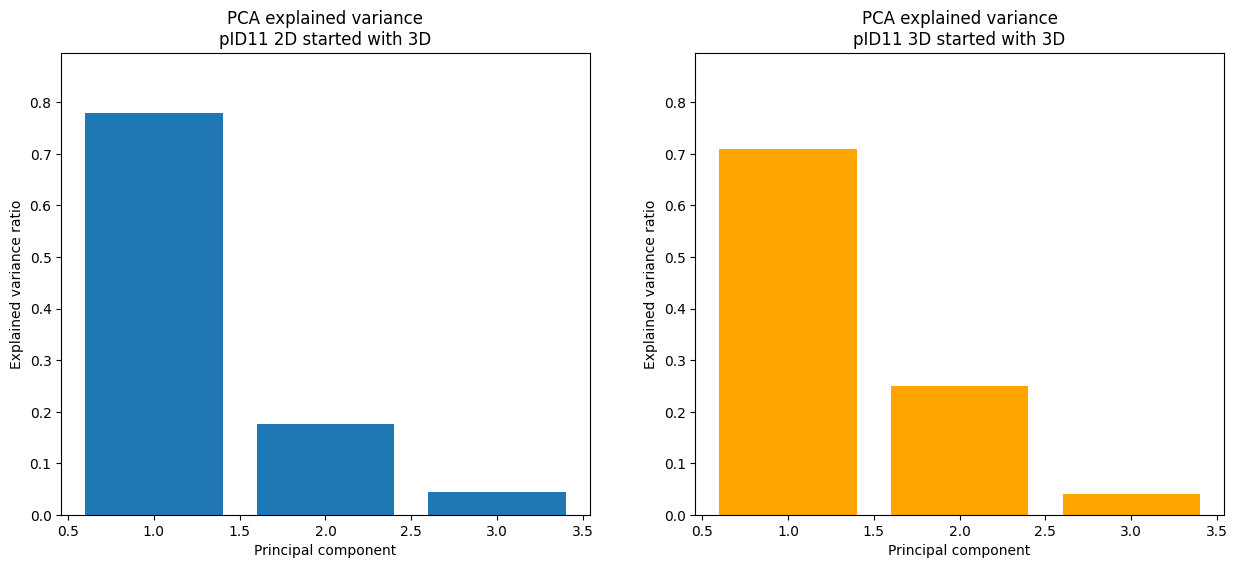

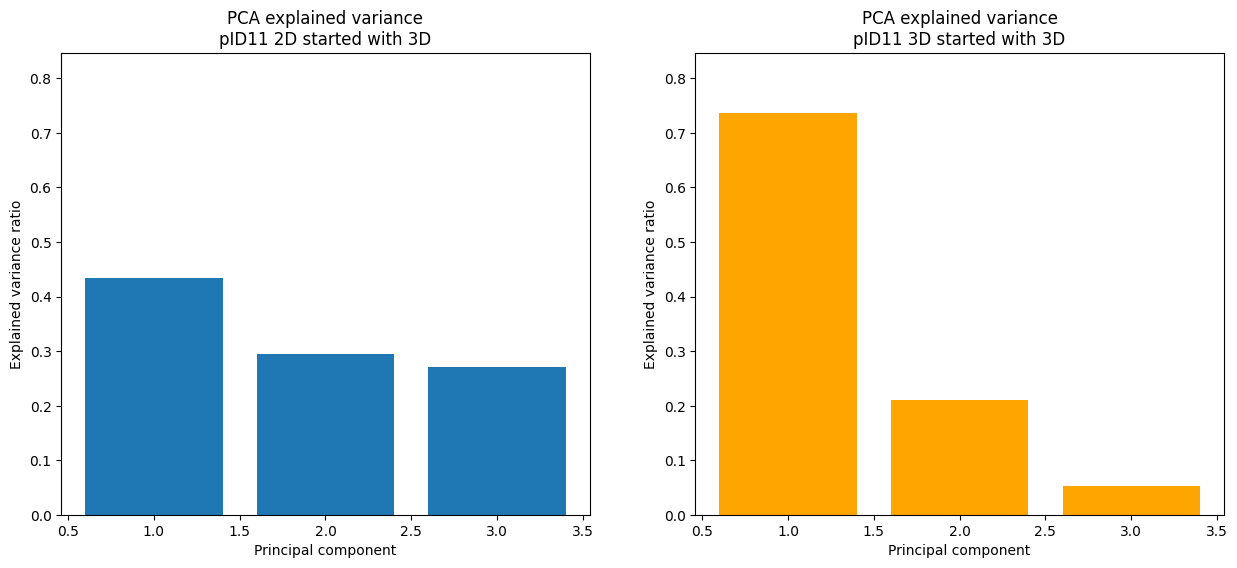

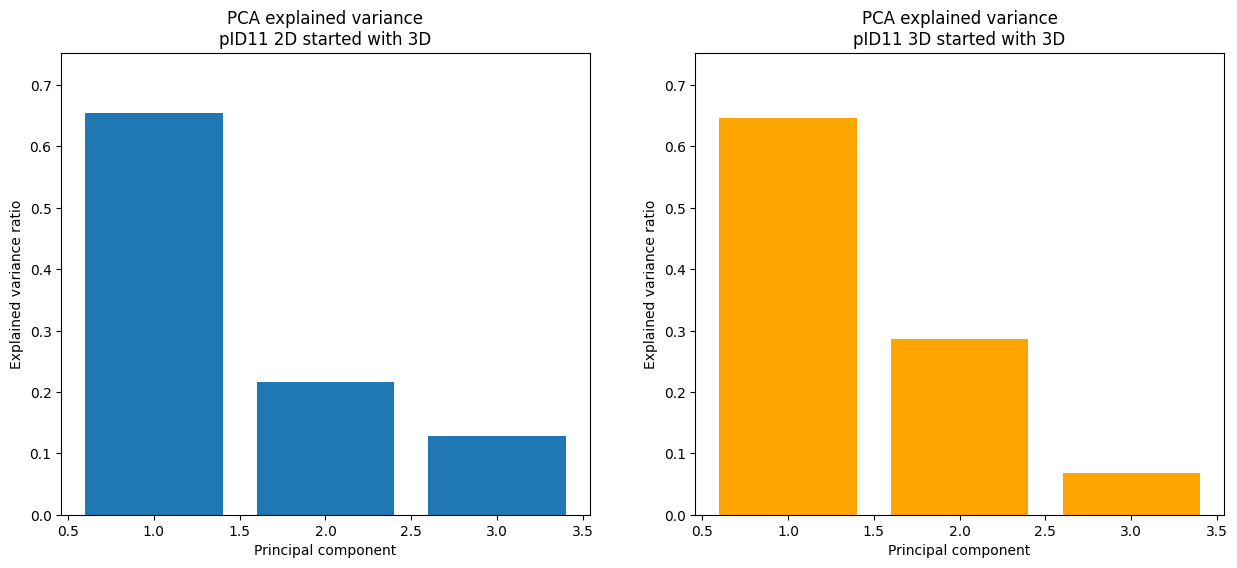

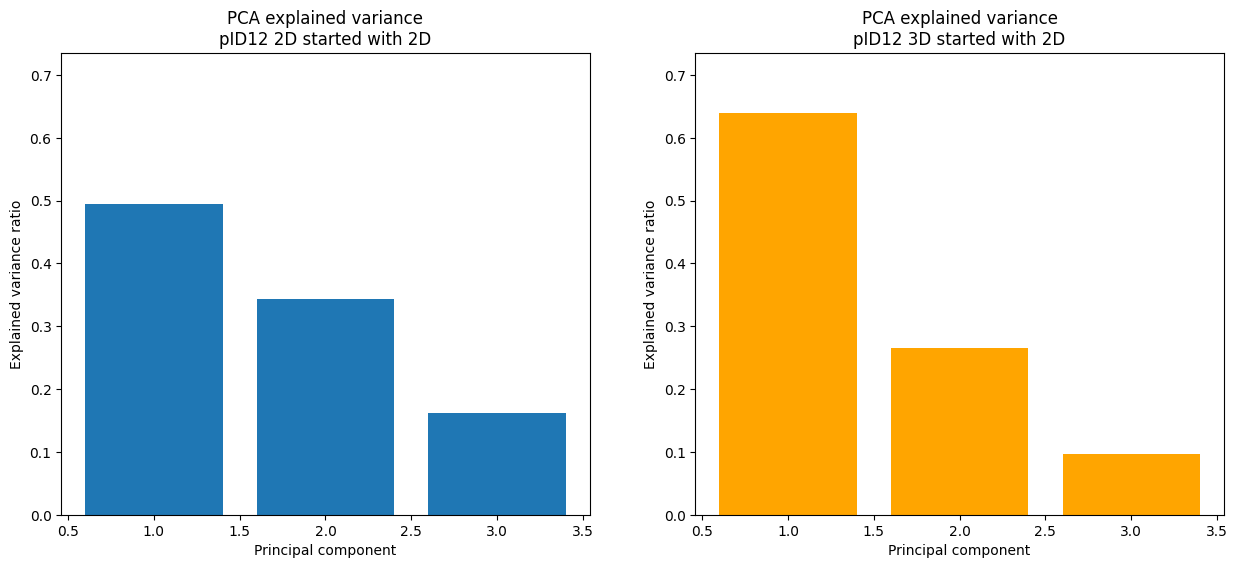

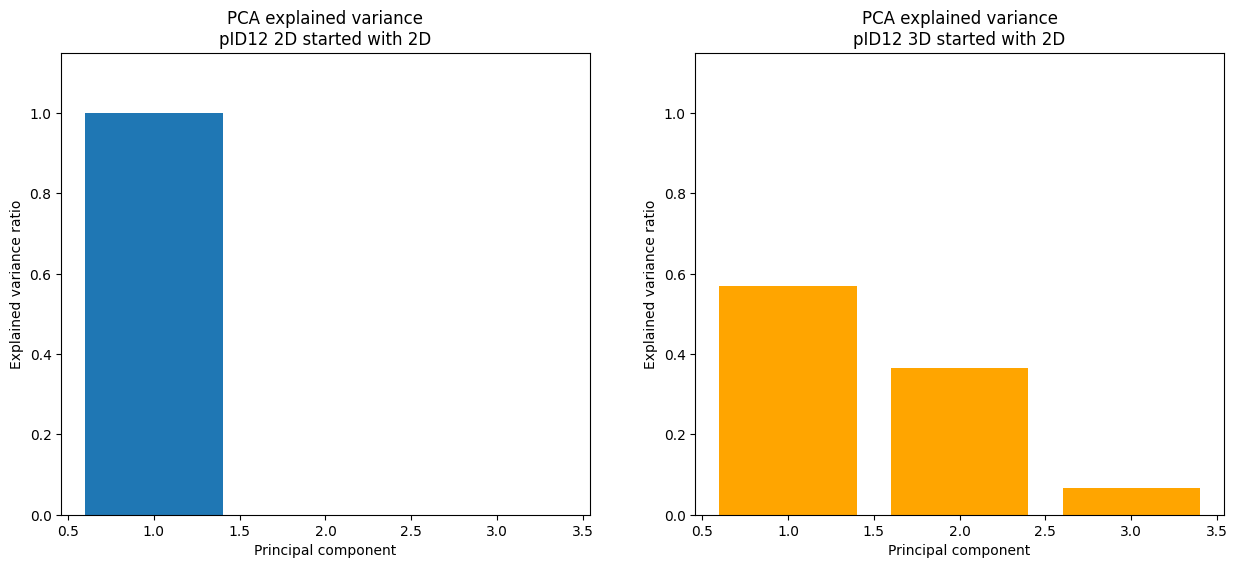

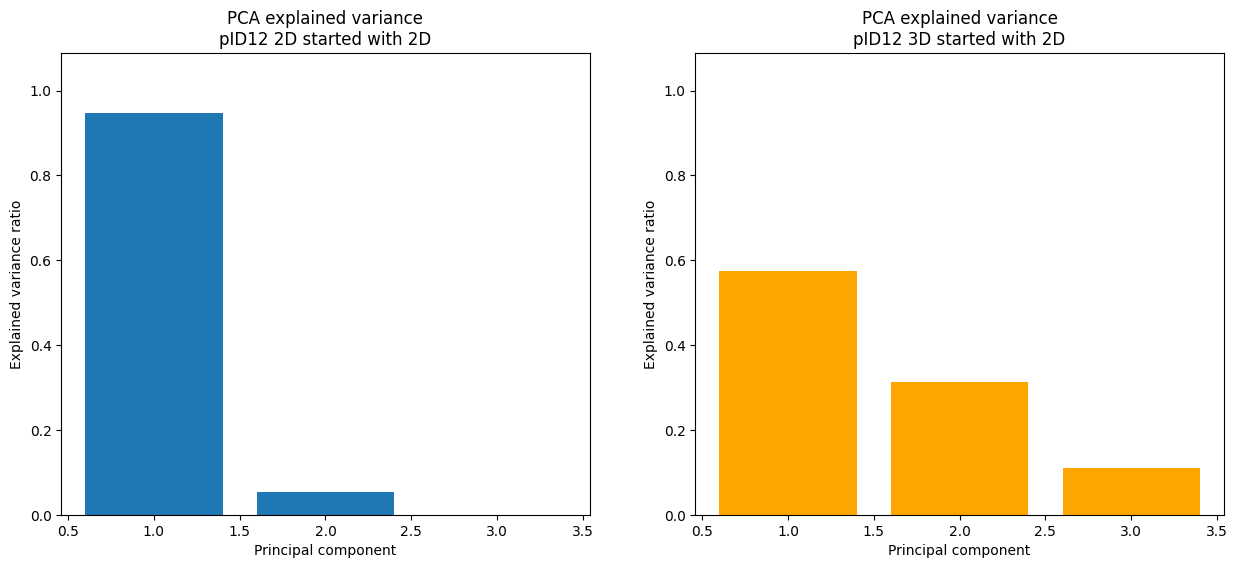

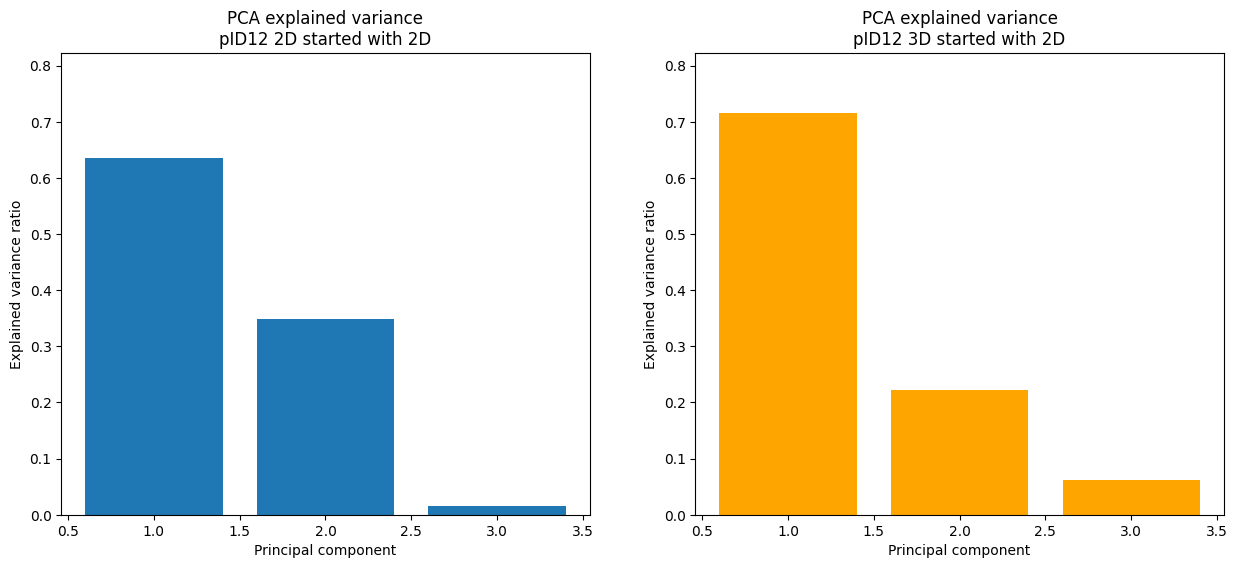

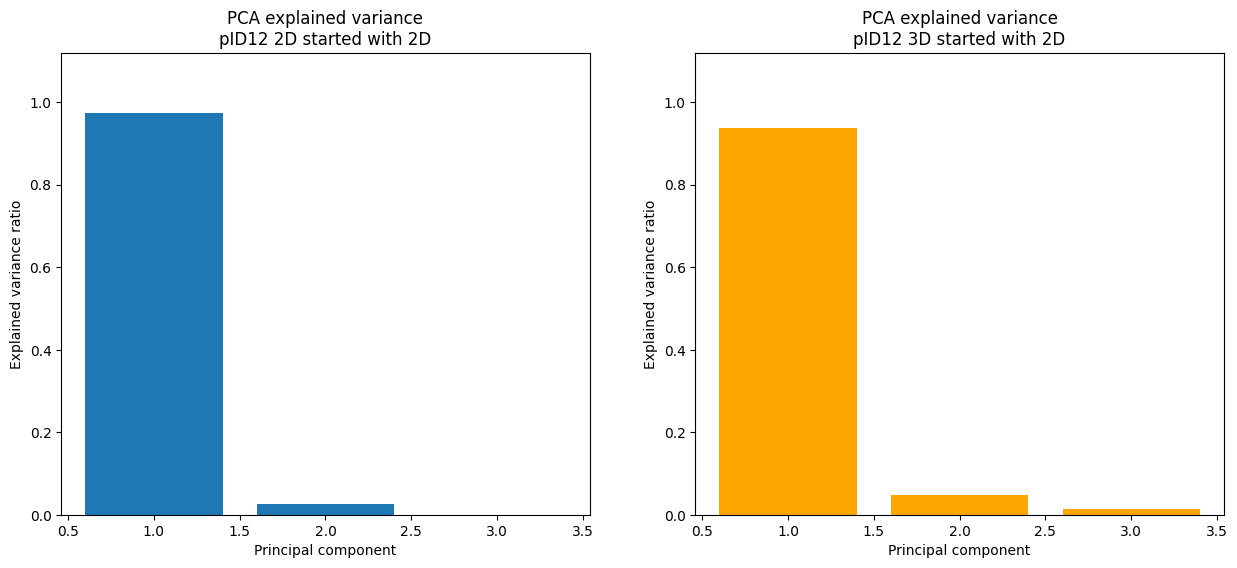

In [48]:

all_data_daw_2D = {'X':[], 'Y':[], 'Z':[]}
all_data_vr_3D = {'X':[], 'Y':[], 'Z':[]}

SERIES_PCA = True
if SERIES_PCA:
    import pandas as pd
    # Columns Player, Track, 2D/3D, Explained variance PC1, Explained variance PC2, Explained variance PC3
    series_explained_variances = pd.DataFrame(columns=['Player',
                                                       'Track',
                                                       '2D/3D',
                                                       'Explained variance PC1',
                                                       'Explained variance PC2',
                                                       'Explained variance PC3'])

    for cur_player in data.keys():
        print("sPCA-Player", cur_player)
        cur_startedwith = participant_start[cur_player]
        print("\tStarted with", cur_startedwith)


        assert np.all([track in data[cur_player] for track in ALLTRACKS]), 'Not all tracks found for participant %s'%cur_player

        for cur_track in ALLTRACKS:
            print("\t\tTrack", cur_track)
            
            assert np.all([automation in data[cur_player][cur_track] for automation in ALLAUTOMATIONS]), 'Not all automations found for participant %s and track %s'%(cur_player, cur_track)

            cur_XYZ_data2D = [data[cur_player][cur_track][automation]['2D'] for automation in ALLAUTOMATIONS]
            cur_XYZ_data3D = [data[cur_player][cur_track][automation][DATA_3D_TO_USE] for automation in ALLAUTOMATIONS]

            all_data_daw_2D['X'].extend(cur_XYZ_data2D[0])
            all_data_daw_2D['Y'].extend(cur_XYZ_data2D[1])
            all_data_daw_2D['Z'].extend(cur_XYZ_data2D[2])

            all_data_vr_3D['X'].extend(cur_XYZ_data3D[0])
            all_data_vr_3D['Y'].extend(cur_XYZ_data3D[1])
            all_data_vr_3D['Z'].extend(cur_XYZ_data3D[2])

            print('shape 2D:', np.shape(cur_XYZ_data2D))
            print('shape 3D:', np.shape(cur_XYZ_data3D))





            DO_PLOT = True
            if DO_PLOT:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
                fig_redraw, axes_redraw = plt.subplots(1, 2, figsize=(15,6))
            else:
                fig = None
                ax1, ax2 = None, None
                fig_redraw = None
                axes_redraw = (None,None)

            max_explained_variance = 0.0
            for type2D3D, dataXYZ, ax,axredraw in zip(['2D','3D'], [cur_XYZ_data2D, cur_XYZ_data3D], (ax1, ax2),axes_redraw):
                print("\t\t\t", type2D3D)
                # Perform PCA
                print('\t\t\t\tDimensions', len(ALLAUTOMATIONS))
                pca = PCA(n_components=len(ALLAUTOMATIONS))
                wellformed_data = np.array(dataXYZ).T
                assert np.shape(wellformed_data) == (1000,3)
                pca.fit(wellformed_data)
                print("Explained variance ratio", pca.explained_variance_ratio_)
                # Plot as bars
                if DO_PLOT:
                    if type2D3D == '3D':
                        ax.bar(range(1, len(ALLAUTOMATIONS)+1), pca.explained_variance_ratio_, color='orange')
                    else:
                        ax.bar(range(1, len(ALLAUTOMATIONS)+1), pca.explained_variance_ratio_)

                newrow = {'Player':cur_player,
                        'Track':cur_track,
                        '2D/3D':type2D3D,
                        'Explained variance PC1':pca.explained_variance_ratio_[0],
                        'Explained variance PC2':pca.explained_variance_ratio_[1],
                        'Explained variance PC3':pca.explained_variance_ratio_[2]}
                series_explained_variances = pd.concat([series_explained_variances, pd.DataFrame([newrow])], ignore_index=True)


                if DO_PLOT:
                    ax.set_xlabel('Principal component')
                    ax.set_ylabel('Explained variance ratio')
                    titll = 'PCA explained variance\np' + cur_player + ' '+type2D3D+' started with ' + cur_startedwith
                    ax.set_title(titll)
                max_explained_variance = max(max_explained_variance, np.max(pca.explained_variance_ratio_))


                #axredraw
                if DO_PLOT:
                    axredraw.plot(pca.components_[0],pca.components_[1], 'o', color='orange')
                    axredraw.set_xlabel('PC1')
                    axredraw.set_ylabel('PC2')
                    titll = 'PCA components\np' + cur_player + ' '+type2D3D+' started with ' + cur_startedwith
                    axredraw.set_title(titll)

            if DO_PLOT:
                ax1.set_ylim([0, max_explained_variance*1.15])
                ax2.set_ylim([0, max_explained_variance*1.15])

                import os
                if not os.path.exists('plots/PCA-series'):
                    os.makedirs('plots/PCA-series')
                fig.savefig('plots/PCA-series/sPCA_explained_variance_'+cur_player+'_'+cur_track+'.png')
                fig_redraw.savefig('plots/PCA-series/sPCA_redrawn_'+cur_player+'_'+cur_track+'.png')
                plt.close()

In [43]:
DEFAULT_MATPLOTLIB_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

2D
3D


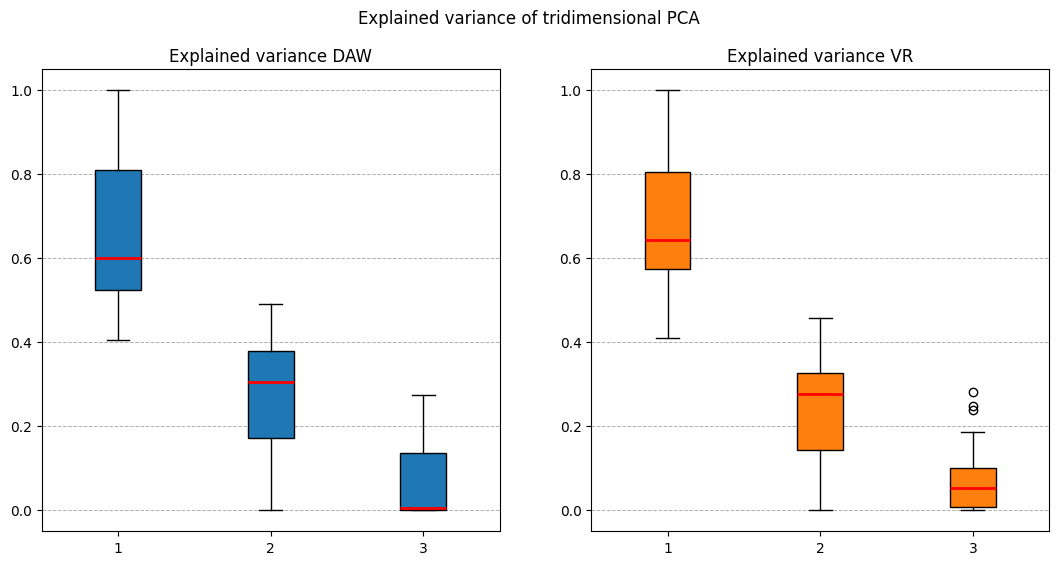

In [44]:

fig, axes = plt.subplots(1, 2, figsize=(13,6))
for type2D3D,ax in zip(['2D','3D'],axes):
    print(type2D3D)
    curdata = series_explained_variances[series_explained_variances['2D/3D'] == type2D3D]
    # display(data)

    # Get matrix with PC1, PC2, PC3 and plot three boxplots
    curdata = curdata[['Explained variance PC1', 'Explained variance PC2', 'Explained variance PC3']]
    curdata = curdata.to_numpy()
    boxes = ax.boxplot(curdata, patch_artist=True)

    plottype = 'DAW' if type2D3D == '2D' else 'VR'
    ax.title.set_text('Explained variance '+plottype)
    # Color the boxes
    colors = {'2D':DEFAULT_MATPLOTLIB_COLORS[0], '3D':DEFAULT_MATPLOTLIB_COLORS[1]}
    for patch in boxes['boxes']:
        patch.set_facecolor(colors[type2D3D])
    # Set median line red
    for median in boxes['medians']:
        median.set(color='red', linewidth=2)


    ax.grid(axis='y', linestyle='--', linewidth=.7)

fig.savefig('plots/PCA-series/0-sPCA_explained_variance_boxplots.png', bbox_inches='tight')
#Set title
plt.suptitle('Explained variance of tridimensional PCA')


plt.show()

2D
shape (60000, 3)
				Dimensions 3
Explained variance ratio [0.39571807 0.31181341 0.29246852]
Mean [0.50517198 0.52452466 0.5010292 ]
Noise variance 0.0
n_components 3
Explained variance ratio ['0.40', '0.31', '0.29']
PC Loadings:
[[ 0.02209863  0.81123414  0.5843037 ]
 [ 0.85228249 -0.32080142  0.41315978]
 [-0.52261478 -0.48886155  0.69848993]]
shape (3, 3)
pos [-0.2  0.8  1.8]
pos [-0.2  0.8  1.8]
pos [-0.2  0.8  1.8]
3D
shape (60000, 3)
				Dimensions 3
Explained variance ratio [0.42083617 0.31226638 0.26689744]
Mean [0.50949007 0.57632686 0.48669661]
Noise variance 0.0
n_components 3
Explained variance ratio ['0.42', '0.31', '0.27']
PC Loadings:
[[-0.17830058  0.97855437 -0.1031516 ]
 [-0.4561093   0.01069524  0.88985949]
 [ 0.87187912  0.20571087  0.44442078]]
shape (3, 3)
pos [0.2 1.2 2.2]
pos [0.2 1.2 2.2]
pos [0.2 1.2 2.2]


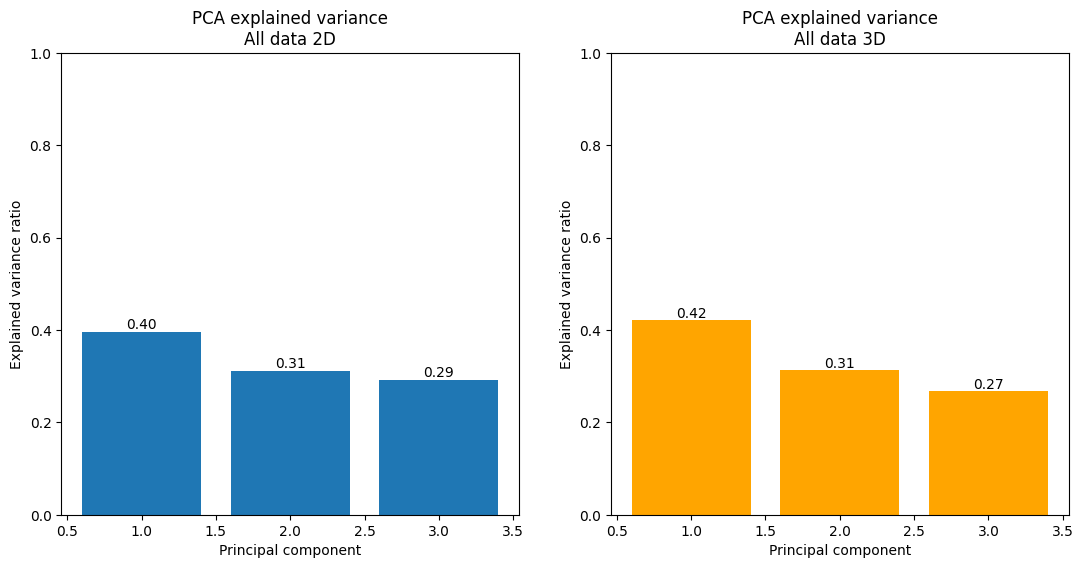

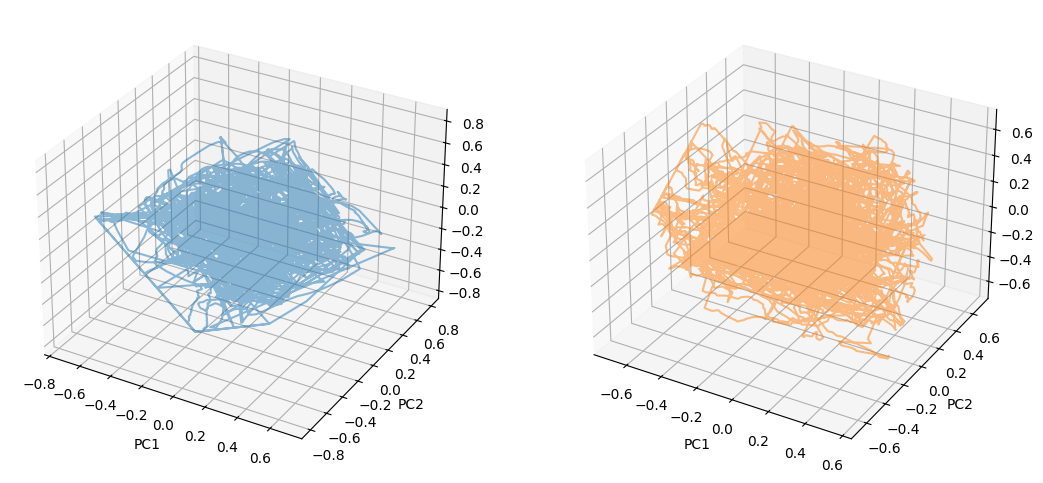

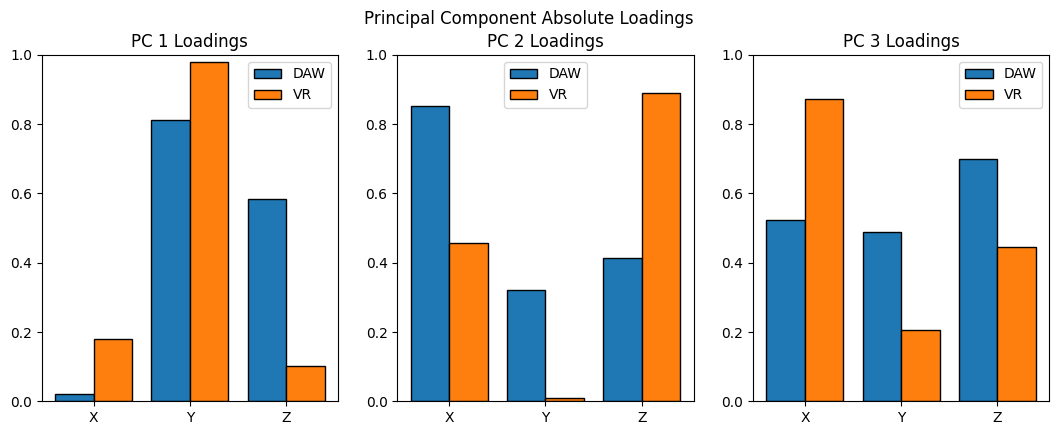

In [54]:
for dim,cdimdata in all_data_daw_2D.items():
    assert len(cdimdata) == 5*1000*12, 'len(all_data_daw_2D[%s] should be 5*1000*12 (=%d) but is %d instead'%(dim, 5*1000*12, len(cdimdata))
for dim,cdimdata in all_data_vr_3D.items():
    assert len(cdimdata) == 5*1000*12, 'len(all_data_daw_3D[%s] should be 5*1000*12 (=%d) but is %d instead'%(dim, 5*1000*12, len(cdimdata))

# import matplotlib
# matplotlib.use('gtk3agg')


# Perform PCA on all data
fig, axes = plt.subplots(1, 2, figsize=(13,6))

fig_redraw, axes_redraw = plt.subplots(1, 2, figsize=(13,6), subplot_kw={'projection': '3d'})

fig_loadings, axes_loadings = plt.subplots(1, 3, figsize=(13,4.5))

all_data_daw_2D_list = [all_data_daw_2D[dim] for dim in ['X','Y','Z']]
all_data_vr_3D_list = [all_data_vr_3D[dim] for dim in ['X','Y','Z']]

for type2D3D, dataXYZ, ax, axredraw  in zip(['2D','3D'], [all_data_daw_2D_list, all_data_vr_3D_list], axes, axes_redraw):
    print(type2D3D)

    dataXYZ = np.array(dataXYZ).T

    print('shape', np.shape(dataXYZ))
    # Perform PCA
    print('\t\t\t\tDimensions', len(ALLAUTOMATIONS))
    pca = PCA(n_components=len(ALLAUTOMATIONS))
    pcadata = pca.fit_transform(dataXYZ)
    print("Explained variance ratio", pca.explained_variance_ratio_)
    # Plot as bars
    if type2D3D == '3D':
        ax.bar(range(1, len(ALLAUTOMATIONS)+1), pca.explained_variance_ratio_, color='orange')
    else:
        ax.bar(range(1, len(ALLAUTOMATIONS)+1), pca.explained_variance_ratio_)

    # Text value on top of bars
    for i, val in enumerate(pca.explained_variance_ratio_):
        ax.text(i+1, val, '%.2f'%val, ha='center', va='bottom')

    ax.set_xlabel('Principal component')
    ax.set_ylabel('Explained variance ratio')
    titll = 'PCA explained variance\nAll data '+type2D3D
    ax.set_title(titll)

    ax.set_ylim([0, 1])

    print("Mean", pca.mean_)
    print("Noise variance", pca.noise_variance_)
    print("n_components", pca.n_components_)
    print("Explained variance ratio", ['%.2f'%e for e in pca.explained_variance_ratio_])
    
    loadings = pca.components_
    print("PC Loadings:")
    print(loadings)
    print('shape', np.shape(loadings))

    for i in range(3):  # Loop through PCs (3 components)
        cidx = 0 if type2D3D == '2D' else 1
        barwidth = 0.4
        offset = barwidth/2 * (-1 if cidx == 0 else 1)
        pos = np.arange(3) + offset
        print('pos', pos)
        pname = 'DAW' if type2D3D == '2D' else 'VR'
        axes_loadings[i].bar(pos, np.abs(loadings[i]), barwidth, label=pname, color=DEFAULT_MATPLOTLIB_COLORS[cidx], edgecolor='black')
        axes_loadings[i].set_xticks(np.arange(3))
        axes_loadings[i].set_xticklabels(['X', 'Y', 'Z'])
        # axes_loadings[i].set_ylim([-1, 1])  # Loadings typically range from -1 to 1
        axes_loadings[i].set_ylim([0, 1])
        axes_loadings[i].set_title(f'PC {i+1} Loadings')
        axes_loadings[i].legend()


    # Plot entire PC1 and PC2 as scatter
    # axredraw.scatter(pca.components_[0],pca.components_[1], color='orange')
    # now as lines
    # axredraw.plot(pca.components_[0],pca.components_[1], '-', color='orange')

    pname = 'DAW' if type2D3D == '2D' else 'VR'
    # axredraw.scatter(pcadata[:, 0], pcadata[:, 1], alpha=0.5, label='pname', color=DEFAULT_MATPLOTLIB_COLORS[cidx])
    axredraw.plot(pcadata[:, 0], pcadata[:, 1], pcadata[:, 2], alpha=0.5, label='pname', color=DEFAULT_MATPLOTLIB_COLORS[cidx])

    axredraw.set_xlabel('PC1')
    axredraw.set_ylabel('PC2')

    # print("Mean", pca.mean_)
fig.savefig('plots/PCA-series/All_data_explained_variance.png', bbox_inches='tight')
fig_redraw.savefig('plots/PCA-series/All_data_redrawn.png', bbox_inches='tight')

fig_loadings.suptitle('Principal Component Absolute Loadings')
fig_loadings.savefig('plots/PCA-series/All_data_loadings.png', bbox_inches='tight')
plt.show()

raw variances
mean: X 0.51
var: X 0.06
mean: Y 0.52
var: Y 0.08
mean: Z 0.50
var: Z 0.07


array([0.06367165, 0.07526847, 0.06874975])

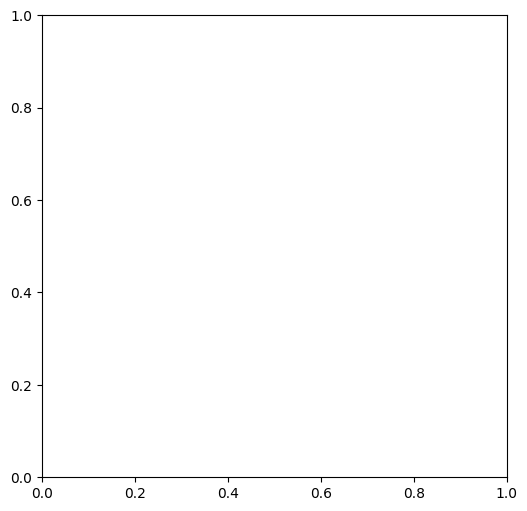

In [72]:
# raw variances
print('raw variances')

fig, ax = plt.subplots(1, 1, figsize=(6,6))
barwidth = 0.4

for dim,cdimdata in all_data_daw_2D.items():
    print('mean:',dim, '%.2f'%np.mean(cdimdata))
    print('var:',dim, '%.2f'%np.var(cdimdata))
pos = np.arange(3) - barwidth/2
np.var(np.array([v for k,v in all_data_daw_2D.items()]), axis=1)
# print('')
# for dim,cdimdata in all_data_vr_3D.items():
#     print('mean:',dim, '%.2f'%np.mean(cdimdata))
#     print('var:',dim, '%.2f'%np.var(cdimdata))

# ax.set_xticks(np.arange(3))
# ax.set_xticklabels(['X', 'Y', 'Z'])
# ax.set_ylabel('Variance')
# ax.set_title('Raw variances')
# ax.legend()
# fig.savefig('plots/PCA-series/All_data_raw_variances.png', bbox_inches='tight')
# plt.show()

In [65]:
# np.var()


dict_values([[np.float64(0.79151946), np.float64(0.7758285836957881), np.float64(0.7601377073915762), np.float64(0.7444468310873643), np.float64(0.7287559547831524), np.float64(0.7130650784789405), np.float64(0.6973742021747286), np.float64(0.6816833258705167), np.float64(0.6659924495663048), np.float64(0.6503015732620929), np.float64(0.6346106969578811), np.float64(0.6189198206536691), np.float64(0.6032289443494573), np.float64(0.5875380680452453), np.float64(0.5718471917410335), np.float64(0.5561563154368216), np.float64(0.5404654391326097), np.float64(0.5247745628283977), np.float64(0.5090836865241859), np.float64(0.49278214931809045), np.float64(0.48763251), np.float64(0.48763251), np.float64(0.48763251), np.float64(0.48763251), np.float64(0.48763251), np.float64(0.5035246061909103), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float64(0.50530034), np.float6